# Problem Statement
To predict the property/house price given some parameters regarding the property/house

# Approach

1.   First we will be analysing the data via Exploratory Data Analysis to derive useful insights. This will help us later in the data preprocessing/cleaning stage. We will do the following:

*   Check the outliers in the numerical features
*   Check the distribution of numerical features
*   Check the distribution and cardinality of categorical features
*   Check the presence of NaN values



2.   Next we will be performing the actual preprocessing/cleaning steps required in order to clean the data and convert it into a proper format for the Machine Learning model to train.
This is neccessary as the Machine Learning model can only work with specific kind of data and thus data preprocessing is required to convert into that particular format! We will perform the following steps:

*   Impute the Missing Values
*   Encode the categorical features
*   Scale the data



3.   Now we will be training the actual Machine Learning model to predict the SalePrice of a property given some input parameters! We will be training 5 Machine Learning models and see which one gives the best resuts.

*   Linear Regression
*   K Nearest Neighbour
*   DecisionTree
*   Random Forest
*   XGBoost
*   Support Vector Machine



4.   After training the model, we will tune the Hyperparameters of the models in order to further improve the results.



5.   Feature Selection/Engineering phase where we will be removing noisy features and/or combine multiple features into one in order to improve the results. We will be performing following techniques:


*   Chisquare pair plot
*   Variance Threshold
*   NaN value threshold
*   Random Forest feature importance

***IMPORTING REQUIRED LIBRARIES***

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

***Reading the data into a Dataframe***

In [2]:
data = pd.read_csv('train1.csv', index_col = 0)

***Taking a deep copy of the data so as to not modify the original data***

In [3]:
data1 = data.copy(deep = True)
data2 = data.copy(deep = True)

***Display the first 5 rows of the dataframe***

In [4]:
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***Display the last 5 rows of the dataframe***

In [5]:
data1.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


***Display all the columns of the dataframe***

In [6]:
data1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

***Display the selected column only***

In [7]:
data1['MSSubClass']#.head()

Id
1       60
2       20
3       60
4       70
5       60
        ..
1456    60
1457    20
1458    70
1459    20
1460    20
Name: MSSubClass, Length: 1461, dtype: int64

***Display the data of multiple selected columns***

In [8]:
data1[['MSSubClass', 'SaleType', 'Utilities']]

,MSSubClass,SaleType,Utilities
Id,,,
1,60,WD,AllPub
2,20,WD,AllPub
3,60,WD,AllPub
4,70,WD,AllPub
5,60,WD,AllPub
...,...,...,...
1456,60,WD,AllPub
1457,20,WD,AllPub
1458,70,WD,AllPub


***Display the Index of the Dataframe***

In [9]:
data1.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1461)

***Create a new column based on existing columns. This helps in reducing the dimensionality of the dataframe.***

***This can also be used to create new features during the feature engineering stage.***

In [10]:
data1['Age'] = data1['YrSold'] - data1['YearBuilt']

In [11]:
data1['Age']

Id
1        5
2       31
3        7
4       91
5        8
        ..
1456     8
1457    32
1458    69
1459    60
1460    43
Name: Age, Length: 1461, dtype: int64

***Select particular rows using "loc" function***

In [12]:
data.loc[3]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


***Select row with Id "3" and column name "LotArea" and "Street"***

In [13]:
data1.loc[3, ['LotArea', 'Street']]

,LotArea,Street
Id,,
3,11250,Pave
3,11250,Pave


***Select all rows with column name "LotArea" and "Street"***

In [14]:
data1.loc[:, ['LotArea', 'Street']]

,LotArea,Street
Id,,
1,8450,Pave
2,9600,Pave
3,11250,Pave
4,9550,Pave
5,14260,Pave
...,...,...
1456,7917,Pave
1457,13175,Pave
1458,9042,Pave


***Select rows using "iloc" function***

In [15]:
data1.iloc[2, 2]

68.0

In [16]:
data1.head(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,16


***Conditional selection of rows.***

In [17]:
data1[data1['LotArea'] >= 5000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69


In [18]:
data1[data1['LotShape'] == 'IR1']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,16
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,4,2007,WD,Normal,182900,26
1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,10,2009,WD,Normal,143750,33
1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2008,WD,Normal,186500,8


***Multiple conditional selection. Conditional selection can help weed out outliers or incorrect data later in the data cleaning stage.***

In [19]:
data1[(data1['LotShape'] == 'IR1') & (data1['LotArea'] >= 50000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,25
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,NaN,NaN,Shed,700,8,2008,WD,Normal,228950,43
452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,...,NaN,NaN,NaN,0,12,2006,WD,Normal,280000,31
458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,...,NaN,NaN,NaN,0,3,2008,WD,Normal,256000,54
1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,6,2010,WD,Normal,160000,62


In [20]:
data1[data1['Age'] > 100]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,...,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000,114
243,50,RM,63.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,4,2006,WD,Normal,79000,106
305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2008,WD,Normal,295000,128
391,50,RL,50.0,8405,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,4,2008,WD,Normal,119000,108
489,190,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,5,2006,ConLD,Normal,160000,106
521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2008,WD,Normal,106250,108
584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2008,WD,Normal,325000,115
631,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,NaN,MnPrv,NaN,0,6,2006,WD,Abnorml,124000,126
654,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,6,2008,WD,Normal,135000,102


***Get statistics of the dataframe i.e. mean, median, mode, correlation, variance, standard deviation and more***

In [21]:
data1.mean()

MSSubClass           57.043121
LotFrontage          70.021613
LotArea           10526.568789
OverallQual           6.108145
OverallCond           5.574949
YearBuilt          1971.417522
YearRemodAdd       1984.881588
MasVnrArea          103.399174
BsmtFinSF1          447.819986
BsmtFinSF2           46.423682
BsmtUnfSF           564.778919
TotalBsmtSF        1059.022587
1stFlrSF           1162.201916
2ndFlrSF            349.606434
LowQualFinSF          5.840520
GrLivArea          1517.648871
BsmtFullBath          0.430527
BsmtHalfBath          0.058179
FullBath              1.566735
HalfBath              0.383299
BedroomAbvGr          2.865845
KitchenAbvGr          1.047228
TotRmsAbvGrd          6.521561
Fireplaces            0.617385
GarageYrBlt        1978.597685
GarageCars            1.772758
GarageArea          474.438741
WoodDeckSF           94.457221
OpenPorchSF          46.863107
EnclosedPorch        22.270363
3SsnPorch             3.626283
ScreenPorch          14.924709
PoolArea

In [22]:
data1.median()

MSSubClass           50.0
LotFrontage          69.0
LotArea            9500.0
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          387.0
BsmtFinSF2            0.0
BsmtUnfSF           473.0
TotalBsmtSF         992.0
1stFlrSF           1086.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1466.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
Age                  35.0
dtype: float

In [23]:
data1.mode()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,20.0,RL,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,Gd,MnPrv,Shed,0.0,6.0,2009.0,WD,Normal,140000.0,1.0
1,NaN,NaN,NaN,9600,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data1.std()

MSSubClass          42.399166
LotFrontage         24.264170
LotArea           9978.398335
OverallQual          1.383591
OverallCond          1.111904
YearBuilt           30.117957
YearRemodAdd        20.621815
MasVnrArea         179.807006
BsmtFinSF1         456.225704
BsmtFinSF2         161.237175
BsmtUnfSF          441.816636
TotalBsmtSF        437.345408
1stFlrSF           386.438405
2ndFlrSF           437.525242
LowQualFinSF        48.606667
GrLivArea          525.591053
BsmtFullBath         0.519614
BsmtHalfBath         0.239941
FullBath             0.551923
HalfBath             0.502972
BedroomAbvGr         0.816653
KitchenAbvGr         0.221671
TotRmsAbvGrd         1.629894
Fireplaces           0.645914
GarageYrBlt         24.666557
GarageCars           0.745101
GarageArea         213.167067
WoodDeckSF         125.298904
OpenPorchSF         66.336846
EnclosedPorch       61.769458
3SsnPorch           30.455221
ScreenPorch         55.565312
PoolArea            40.163610
MiscVal   

In [25]:
data1.var()

MSSubClass       1.797689e+03
LotFrontage      5.887499e+02
LotArea          9.956843e+07
OverallQual      1.914324e+00
OverallCond      1.236331e+00
YearBuilt        9.070913e+02
YearRemodAdd     4.252593e+02
MasVnrArea       3.233056e+04
BsmtFinSF1       2.081419e+05
BsmtFinSF2       2.599743e+04
BsmtUnfSF        1.952019e+05
TotalBsmtSF      1.912710e+05
1stFlrSF         1.493346e+05
2ndFlrSF         1.914283e+05
LowQualFinSF     2.362608e+03
GrLivArea        2.762460e+05
BsmtFullBath     2.699990e-01
BsmtHalfBath     5.757175e-02
FullBath         3.046187e-01
HalfBath         2.529812e-01
BedroomAbvGr     6.669217e-01
KitchenAbvGr     4.913786e-02
TotRmsAbvGrd     2.656555e+00
Fireplaces       4.172044e-01
GarageYrBlt      6.084390e+02
GarageCars       5.551752e-01
GarageArea       4.544020e+04
WoodDeckSF       1.569982e+04
OpenPorchSF      4.400577e+03
EnclosedPorch    3.815466e+03
3SsnPorch        9.275205e+02
ScreenPorch      3.087504e+03
PoolArea         1.613116e+03
MiscVal   

In [26]:
data1.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Age                int64
Length: 81, dtype: object

In [27]:
data1.skew()

MSSubClass        1.408282
LotFrontage       2.167952
LotArea          12.207001
OverallQual       0.211145
OverallCond       0.699951
YearBuilt        -0.613119
YearRemodAdd     -0.503730
MasVnrArea        2.680841
BsmtFinSF1        1.666116
BsmtFinSF2        4.260865
BsmtUnfSF         0.931311
TotalBsmtSF       1.539384
1stFlrSF          1.380760
2ndFlrSF          0.800098
LowQualFinSF      9.014533
GrLivArea         1.359763
BsmtFullBath      0.573321
BsmtHalfBath      4.073444
FullBath          0.040390
HalfBath          0.673828
BedroomAbvGr      0.205781
KitchenAbvGr      4.450652
TotRmsAbvGrd      0.677647
Fireplaces        0.641404
GarageYrBlt      -0.654648
GarageCars       -0.342022
GarageArea        0.180645
WoodDeckSF        1.536496
OpenPorchSF       2.354891
EnclosedPorch     3.058898
3SsnPorch         9.934743
ScreenPorch       4.150322
PoolArea         14.833510
MiscVal          24.475863
MoSold            0.209596
YrSold            0.097290
SalePrice         1.873260
A

***Correlation plot helps us in identifying features which are important in prediting the target feature and those which are just noise features.***

In [28]:
data1.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
MSSubClass,1.000000,-0.386970,-0.140204,0.029215,-0.058640,0.022406,0.036155,0.020924,-0.070292,-0.065841,...,-0.007651,-0.011567,-0.043641,-0.026597,0.008024,-0.006859,-0.019816,-0.018077,-0.087284,-0.023162
LotFrontage,-0.386970,1.000000,0.426891,0.251937,-0.058561,0.126156,0.090753,0.195539,0.236045,0.050986,...,0.152810,0.005554,0.072310,0.041695,0.206251,0.004648,0.015889,0.004589,0.353502,-0.125763
LotArea,-0.140204,0.426891,1.000000,0.105455,-0.006480,0.014888,0.014200,0.105924,0.213482,0.111224,...,0.084328,-0.019506,0.022131,0.043657,0.077601,0.038359,0.002714,-0.013760,0.263512,-0.015467
OverallQual,0.029215,0.251937,0.105455,1.000000,-0.092090,0.570123,0.551546,0.411750,0.240979,-0.060263,...,0.307266,-0.107878,0.022725,0.061846,0.064677,-0.030169,0.071688,-0.028658,0.790975,-0.570446
OverallCond,-0.058640,-0.058561,-0.006480,-0.092090,1.000000,-0.375386,0.067433,-0.125485,-0.047632,0.040780,...,-0.033467,0.066376,0.020872,0.058315,-0.001962,0.068289,-0.005177,0.045877,-0.078669,0.376783
YearBuilt,0.022406,0.126156,0.014888,0.570123,-0.375386,1.000000,0.597640,0.319811,0.251461,-0.050106,...,0.186465,-0.390106,0.034848,-0.048950,0.004621,-0.031227,0.019572,-0.015426,0.523201,-0.999038
YearRemodAdd,0.036155,0.090753,0.014200,0.551546,0.067433,0.597640,1.000000,0.185019,0.129753,-0.066910,...,0.225122,-0.199830,0.047059,-0.035263,0.005781,-0.008842,0.024490,0.036410,0.509081,-0.595063
MasVnrArea,0.020924,0.195539,0.105924,0.411750,-0.125485,0.319811,0.185019,1.000000,0.270786,-0.071834,...,0.128980,-0.108869,0.014236,0.056217,0.011911,-0.029063,-0.003799,-0.006784,0.480492,-0.319572
BsmtFinSF1,-0.070292,0.236045,0.213482,0.240979,-0.047632,0.251461,0.129753,0.270786,1.000000,-0.052076,...,0.109382,-0.103667,0.028895,0.060804,0.139774,0.004678,-0.012205,0.014152,0.387234,-0.250428
BsmtFinSF2,-0.065841,0.050986,0.111224,-0.060263,0.040780,-0.050106,-0.066910,-0.071834,-0.052076,1.000000,...,0.003035,0.035386,-0.030853,0.090027,0.041769,0.005184,-0.014849,0.033595,-0.012058,0.051498


***Display and remove the duplicate rows in the Dataframe. Duplicate rows increase the computational time of the Machine Learning model and also result in falsely positive results.***

In [29]:
data1[data1.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,16
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,3
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,36
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,77


In [30]:
data1.drop_duplicates(keep = 'first', inplace = True)

In [31]:
data1[data1.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,


***Sort the dataframe in ascending or descending order based on a particular column.***

In [32]:
low_to_high_price = data1.sort_values('SalePrice', ascending = True)

In [33]:
low_to_high_price.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900,89
917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311,57
969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900,99
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,NaN,NaN,NaN,0,1,2007,WD,Normal,39300,61
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000,88
711,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2008,WD,Normal,52000,73
1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,Corner,...,NaN,NaN,NaN,0,3,2006,WD,Normal,52500,65
1326,30,RM,40.0,3636,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,1,2008,WD,Normal,55000,86
706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000,80


***Grouby data based on specific columns and statitical parameters.***

In [34]:
data1.groupby(['LotShape']).mean()#median/sum

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
LotShape,,,,,,,,,,,,,,,,,,,,,
IR1,50.322245,76.034921,11905.686071,6.436590,5.559252,1980.020790,1988.650728,130.434238,523.790021,52.669439,...,52.336798,16.550936,4.769231,18.259875,3.767152,74.074844,6.471933,2007.733888,206279.326403,27.713098
IR2,52.073171,76.500000,23733.658537,6.731707,5.560976,1985.268293,1996.024390,126.243902,468.146341,100.365854,...,71.170732,2.268293,7.073171,34.634146,0.000000,23.902439,6.365854,2007.853659,239833.365854,22.585366
IR3,41.000000,138.428571,41338.200000,6.800000,4.800000,1987.800000,1995.800000,79.600000,1114.100000,82.000000,...,64.600000,0.000000,0.000000,14.700000,48.000000,0.000000,6.200000,2007.400000,216036.500000,19.600000
Reg,60.926936,67.007109,8878.805889,5.892039,5.594329,1966.054526,1982.312977,88.220637,396.107961,40.920393,...,42.738277,25.930207,2.610687,12.491821,1.893130,27.954198,6.254089,2007.850600,164960.461287,41.796074


In [35]:
data1.groupby(['LotShape', 'Street']).mean()#median/sum

MSSubClass  LotFrontage        LotArea  OverallQual  \
LotShape Street                                                        
IR1      Grvl     190.00000          NaN  164660.000000     5.000000   
         Pave      50.03125    76.034921   11587.447917     6.439583   
IR2      Grvl      90.00000   110.000000    8472.000000     5.000000   
         Pave      51.12500    75.160000   24115.200000     6.775000   
IR3      Pave      41.00000   138.428571   41338.200000     6.800000   
Reg      Grvl      40.00000    79.250000   18421.500000     4.750000   
         Pave      61.01862    66.948810    8836.997809     5.897043   

                 OverallCond    YearBuilt  YearRemodAdd  MasVnrArea  \
LotShape Street                                                       
IR1      Grvl       6.000000  1965.000000   1965.000000    0.000000   
         Pave       5.558333  1980.052083   1988.700000  130.707113   
IR2      Grvl       5.000000  1963.000000   1963.000000    0.000000   
         Pave       5.575000  1985.825000   1996.850000  129.400000   
IR3      Pave       4.800000  1987.800000   1995.800000   79.600000   
Reg      Grvl       4.500000  1960.000000   1963.750000   82.500000   
         Pave       5.599124  1966.081051   1982.394304   88.245865   

                  BsmtFinSF1  BsmtFinSF2  ...  OpenPorchSF  EnclosedPorch  \
LotShape Street                           ...                               
IR1      Grvl    1249.000000  147.000000  ...     0.000000       0.000000   
         Pave     522.279167   52.472917  ...    52.445833      16.585417   
IR2      Grvl     104.000000  712.000000  ...     0.000000       0.000000   
         Pave     477.250000   85.075000  ...    72.950000       2.325000   
IR3      Pave    1114.100000   82.000000  ...    64.600000       0.000000   
Reg      Grvl     493.750000    0.000000  ...    78.750000       0.000000   
         Pave     395.680175   41.099671  ...    42.580504      26.043812   

                 3SsnPorch  ScreenPorch   PoolArea     MiscVal    MoSold  \
LotShape Street                                                            
IR1      Grvl     0.000000     0.000000   0.000000  700.000000  8.000000   
         Pave     4.779167    18.297917   3.775000   72.770833  6.468750   
IR2      Grvl     0.000000     0.000000   0.000000    0.000000  5.000000   
         Pave     7.250000    35.500000   0.000000   24.500000  6.400000   
IR3      Pave     0.000000    14.700000  48.000000    0.000000  6.200000   
Reg      Grvl     0.000000    65.750000   0.000000  153.500000  6.000000   
         Pave     2.622125    12.258488   1.901424   27.404162  6.255203   

                      YrSold      SalePrice        Age  
LotShape Street                                         
IR1      Grvl    2008.000000  228950.000000  43.000000  
         Pave    2007.733333  206232.095833  27.681250  
IR2      Grvl    2010.000000  110000.000000  47.000000  
         Pave    2007.800000  243079.200000  21.975000  
IR3      Pave    2007.400000  216036.500000  19.600000  
Reg      Grvl    2008.000000  110548.250000  48.000000  
         Pave    2007.849945  165198.849945  41.768894  

[7 rows x 38 columns]

***Get general info of the dataframe i.e. data types, non null values, statitical measures and more with just a couple lines of code!***

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1449 non-null   int64  
 1   MSZoning       1449 non-null   object 
 2   LotFrontage    1192 non-null   float64
 3   LotArea        1449 non-null   int64  
 4   Street         1449 non-null   object 
 5   Alley          90 non-null     object 
 6   LotShape       1449 non-null   object 
 7   LandContour    1449 non-null   object 
 8   Utilities      1449 non-null   object 
 9   LotConfig      1449 non-null   object 
 10  LandSlope      1449 non-null   object 
 11  Neighborhood   1449 non-null   object 
 12  Condition1     1449 non-null   object 
 13  Condition2     1449 non-null   object 
 14  BldgType       1449 non-null   object 
 15  HouseStyle     1449 non-null   object 
 16  OverallQual    1449 non-null   int64  
 17  OverallCond    1449 non-null   int64  
 18  YearBuil

In [37]:
data1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
count,1449.000000,1192.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1441.000000,1449.000000,1449.000000,...,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,57.018634,70.019295,10527.924086,6.102830,5.576259,1971.384403,1984.897861,103.274809,445.485852,46.786059,...,46.879917,21.968254,3.435473,15.048309,2.779848,42.956522,6.329193,2007.808834,181147.434092,36.424431
std,42.394820,24.347342,10017.414231,1.383525,1.113647,30.113447,20.622309,180.177681,456.278542,161.852487,...,66.424702,61.225427,29.426965,55.778398,40.328903,497.702200,2.705628,1.326016,79582.194457,30.164123
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,20.000000,59.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000,8.000000
50%,50.000000,69.000000,9490.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,35.000000
75%,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,714.000000,0.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,136.000000


In [38]:
data1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      257
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Age                0
Length: 81, dtype: int64

***Separating dataframe into numerical and categorical columns for Visualization***

In [39]:
num = data1.select_dtypes(include = 'number')
cat = data1.select_dtypes(include = 'object')

***Fins out the outliers of numerical features using Boxplot. We can see that most of the numerical features contain outliers and hence their distribution should to be skewed.***

***Boxplot also helps us in understanding the distribution of the features along with uncovering statistical measures. For example the lowermost line is the minimum percentile, the baseline of the box is 25th percentile, the middle line is the 50 percentile(or median), the uppermost line of the box is 75th percentile and the topmost line is the maximum percentile.***

<Axes: >

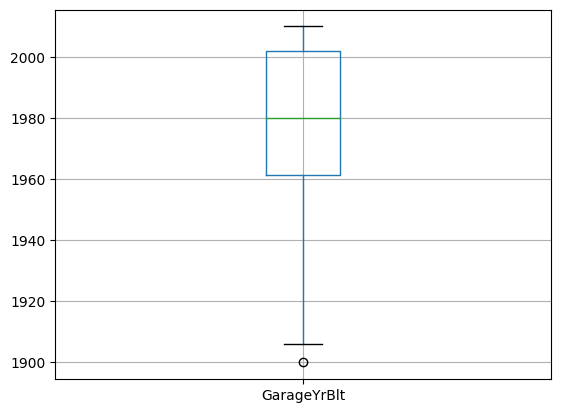

In [40]:
num.boxplot(column = 'GarageYrBlt')

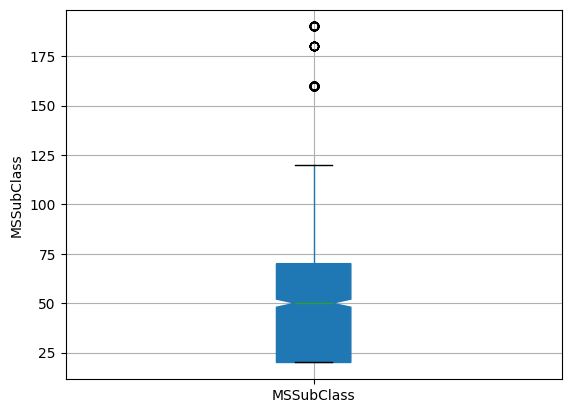

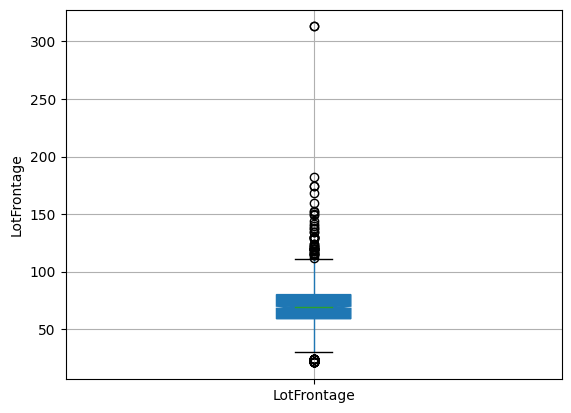

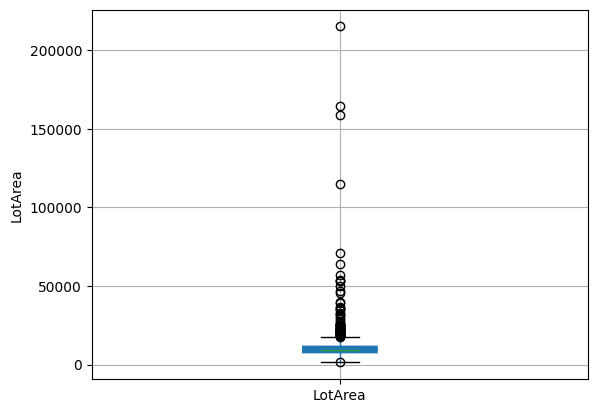

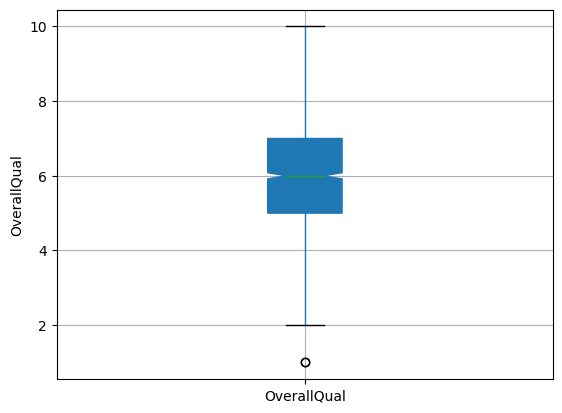

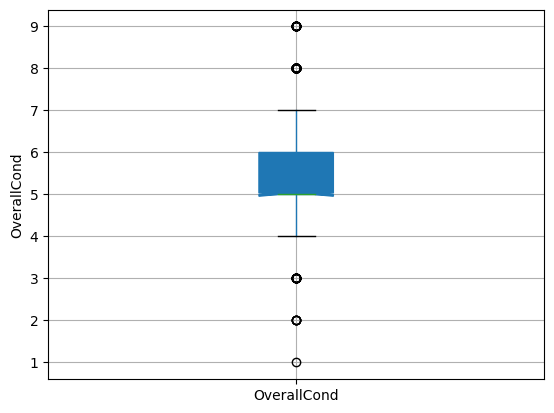

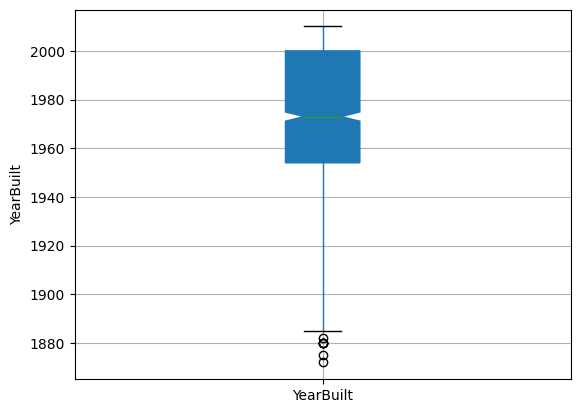

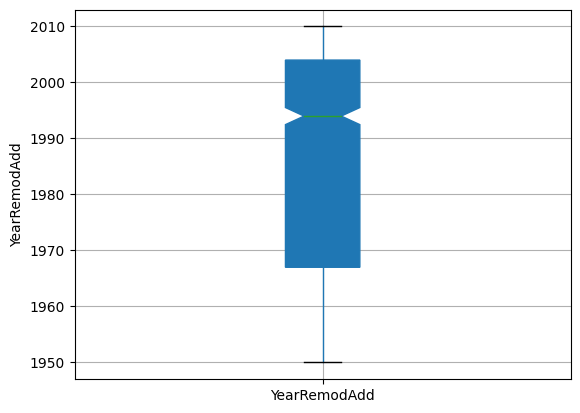

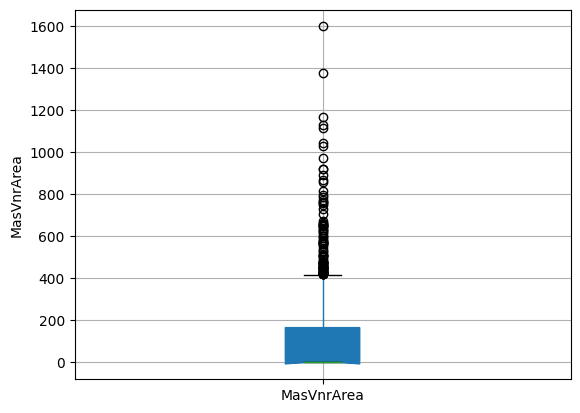

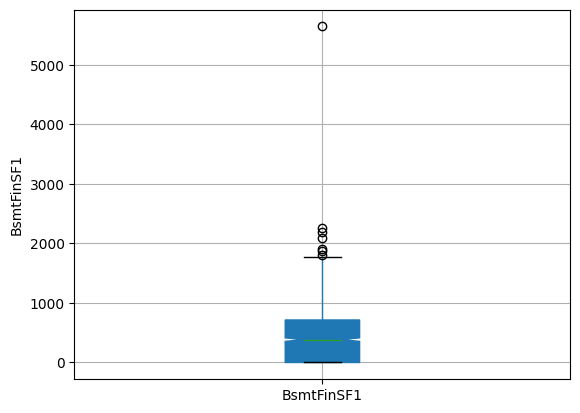

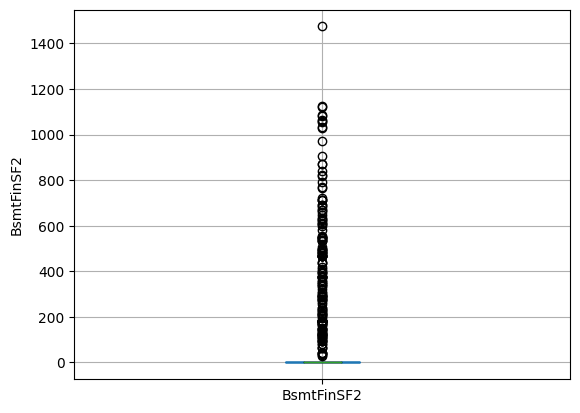

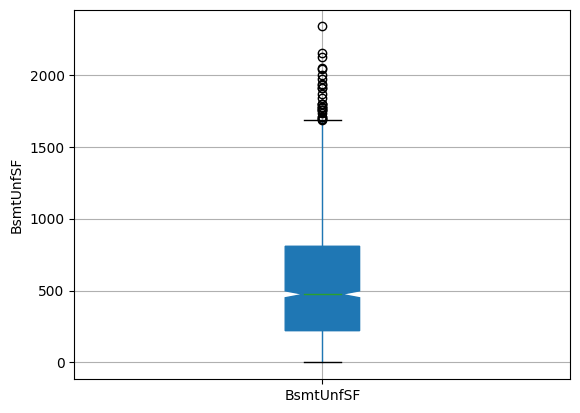

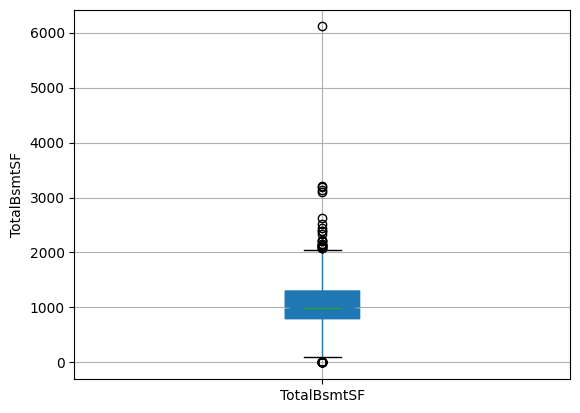

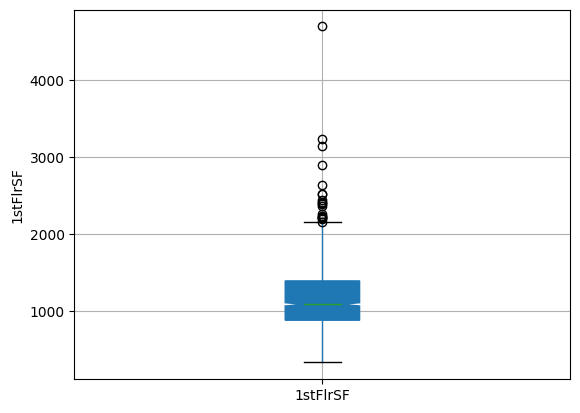

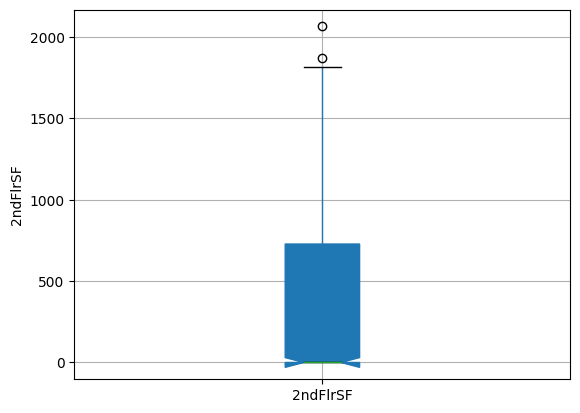

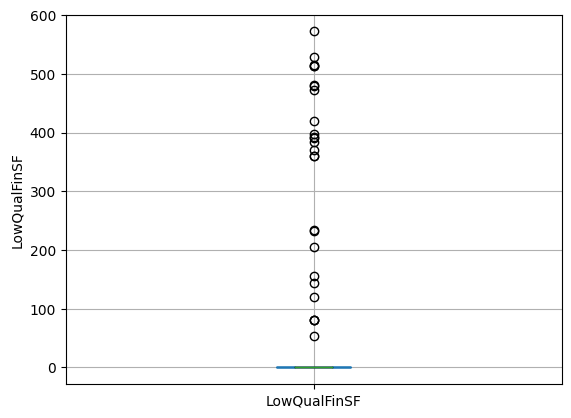

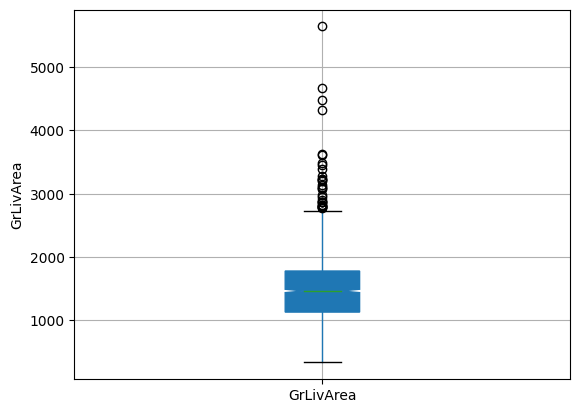

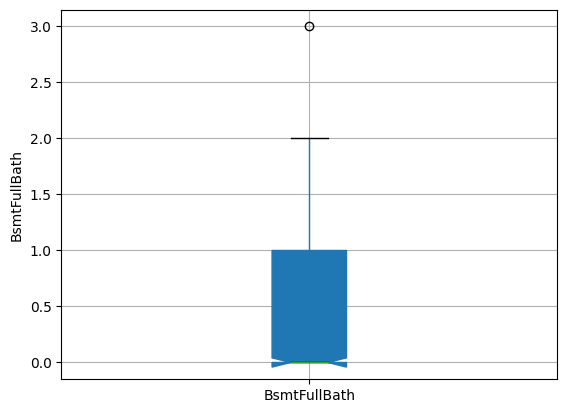

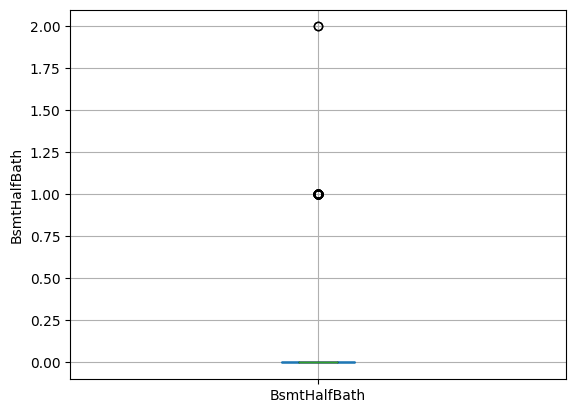

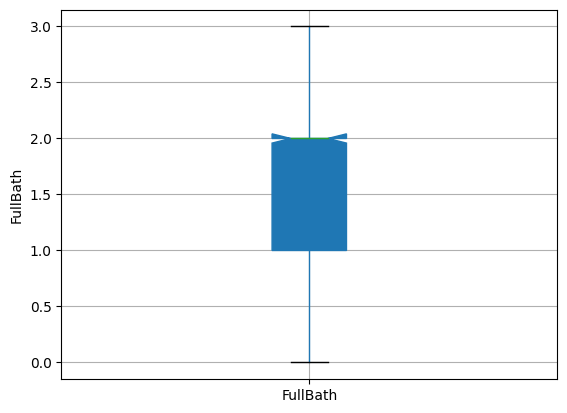

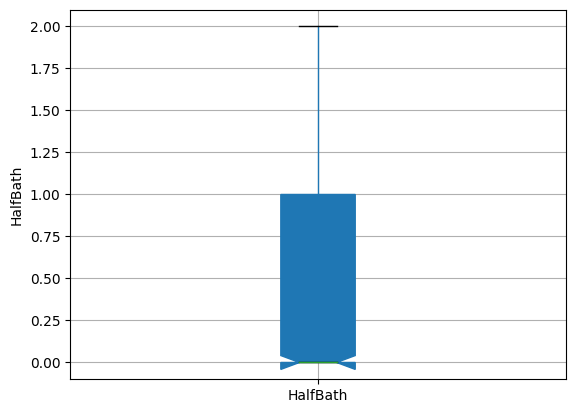

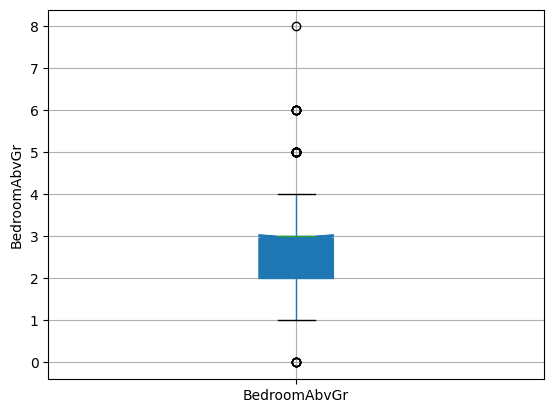

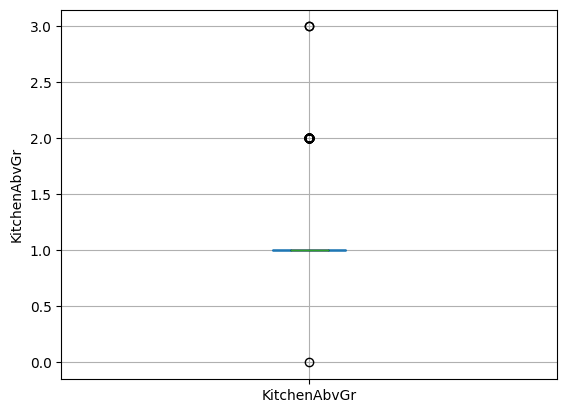

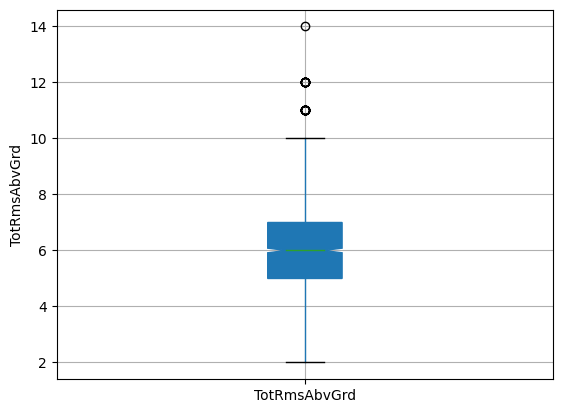

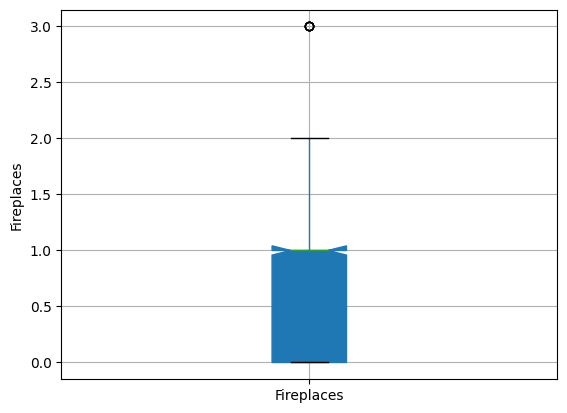

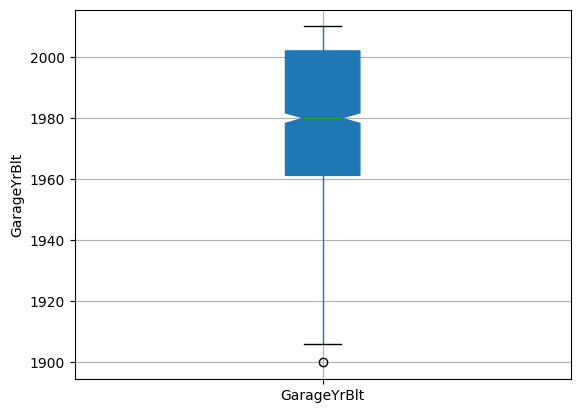

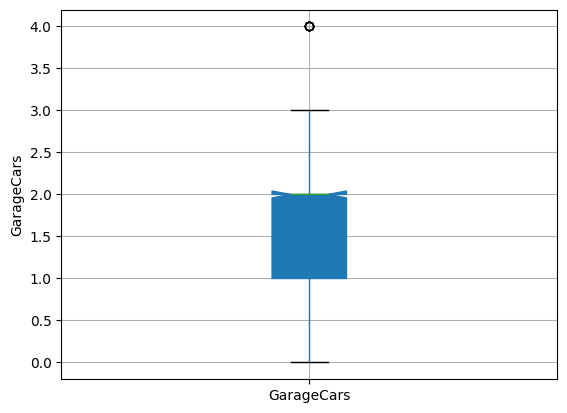

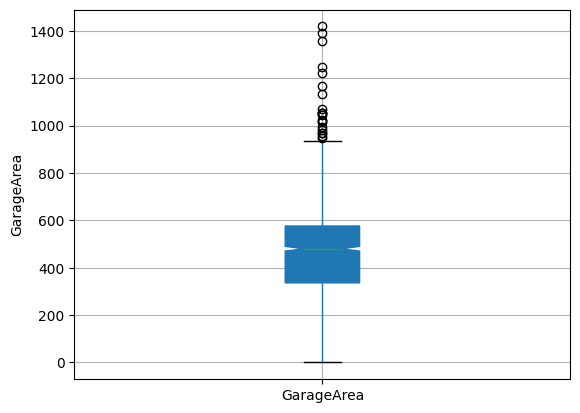

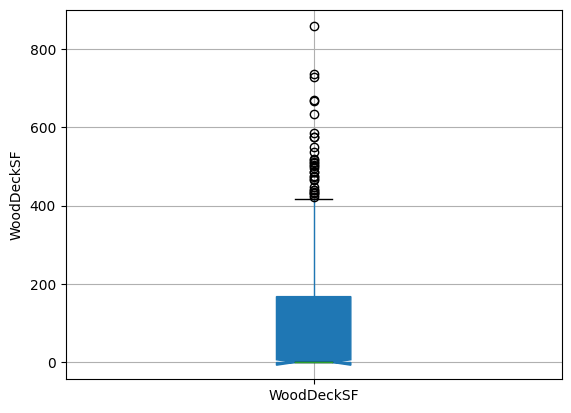

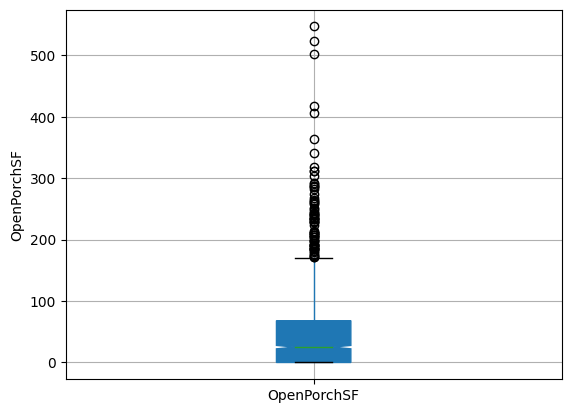

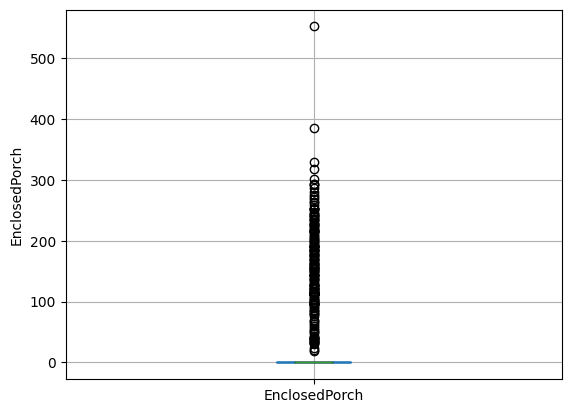

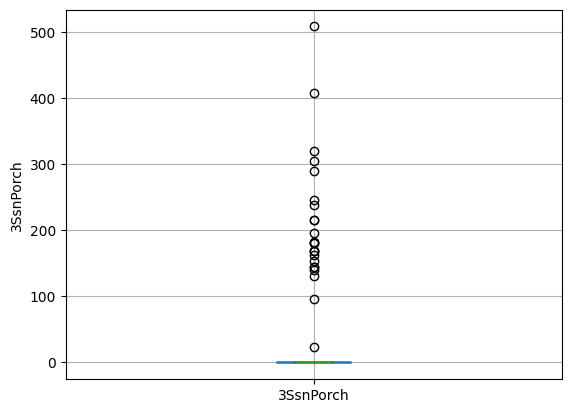

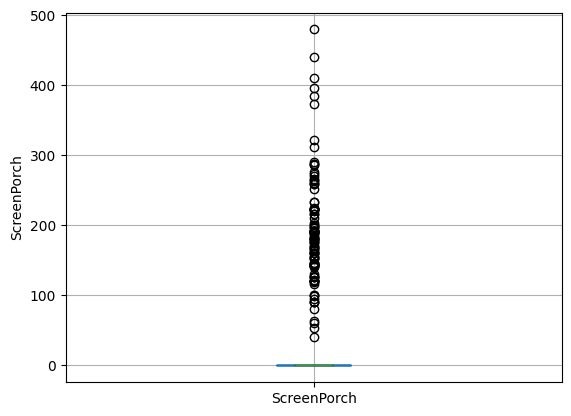

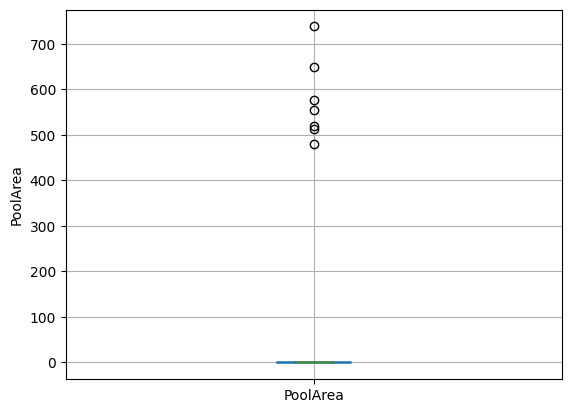

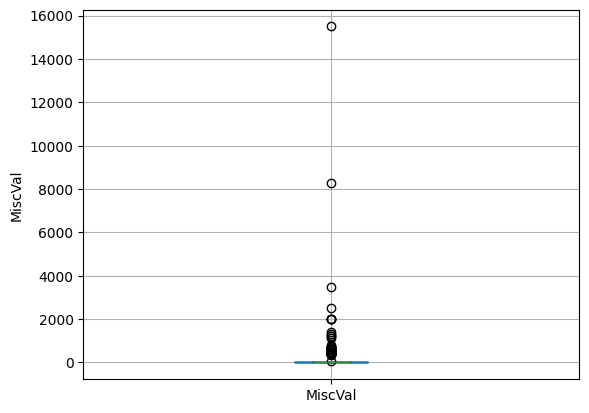

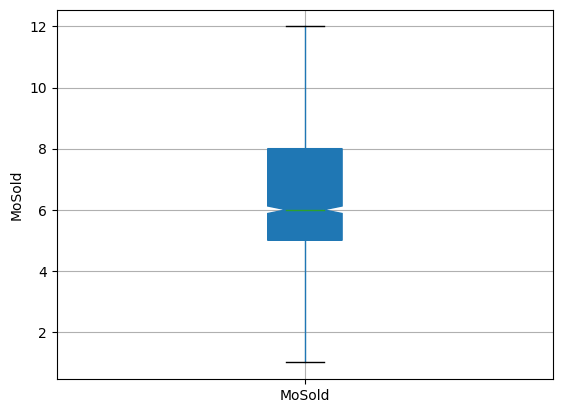

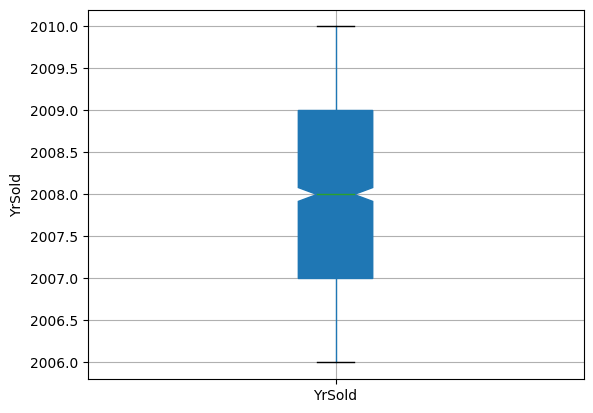

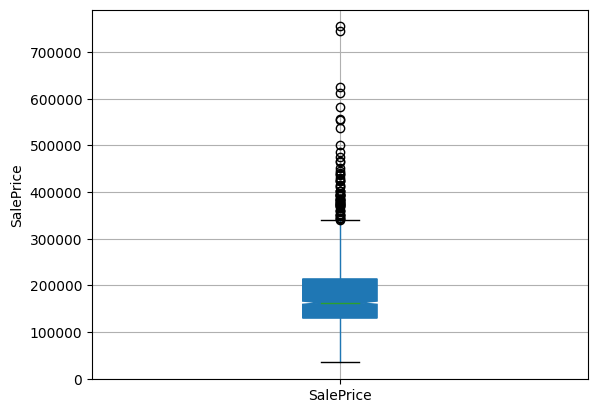

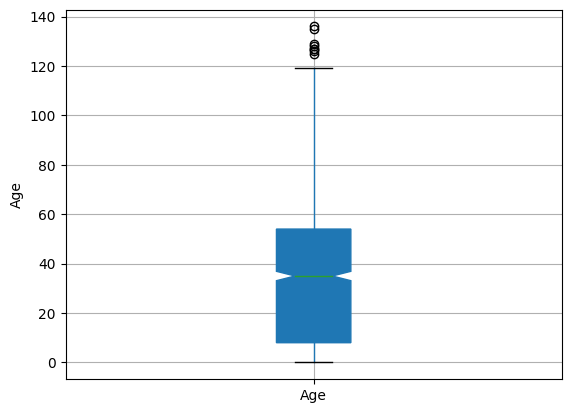

In [41]:
for i in num:
    num.boxplot(column = i, patch_artist = True, notch ='True')
    plt.ylabel(i)
    plt.show()

***From the boxplots, we can see there are a lot of outliers present in the dataset. In order to remove them we will use the IQR method which will basically set an upper limit and lower limit on the range of values (based on the 25th and the 75th percentile value) and then remove values outside of this range.***

In [42]:
data1.shape

(1449, 81)

***Calculating the 25th and 75th percentile values for a columns.***

In [43]:
percentile25 = data1['MSSubClass'].quantile(0.25)
percentile75 = data1['MSSubClass'].quantile(0.75)

***Calculating the IQR value.***

In [44]:
iqr=percentile75 - percentile25

***Calculating the upper limit and the lower limit in order to define a range of good data points.***

In [45]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [46]:
upper_limit

145.0

In [47]:
lower_limit

-55.0

***Data points that lie outside the IQR range.***

In [48]:
upper_data_points = data1[data1['MSSubClass'] > upper_limit]
lower_data_points = data1[data1['MSSubClass'] < lower_limit]

In [49]:
upper_data_points.shape

(103, 81)

In [50]:
lower_data_points.shape

(0, 81)

***Removing the outliers(the data points that lie outside the IQR range).***

In [51]:
data1 = data1[(data1['MSSubClass'] < upper_limit) & (data1['MSSubClass'] > lower_limit)]

In [52]:
data1.shape

(1346, 81)

***Check the distribution of numerical features using distplot. This helps in checking the skewness of numerical features. As seen above in the boxplots, most of the numerical features have outliers and hence the distribution is skewed thus validating our previous insight.***

<Axes: xlabel='MoSold', ylabel='Density'>

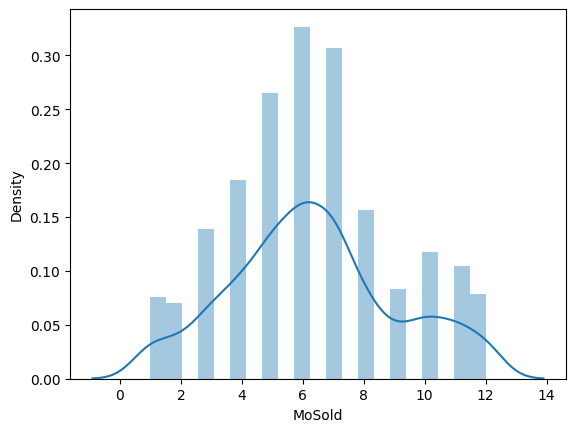

In [53]:
sns.distplot(data['MoSold'])

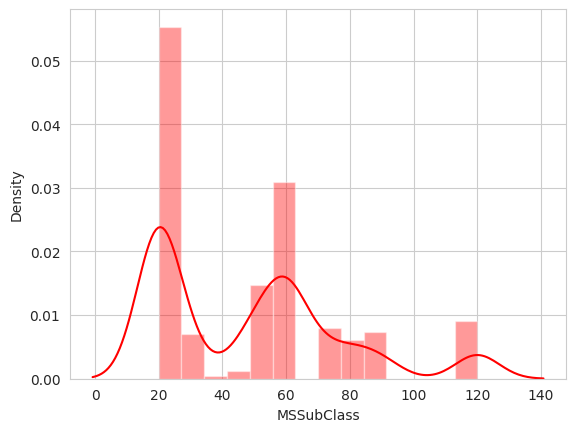

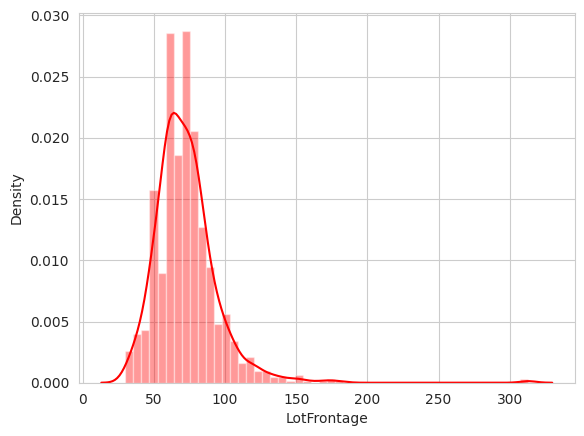

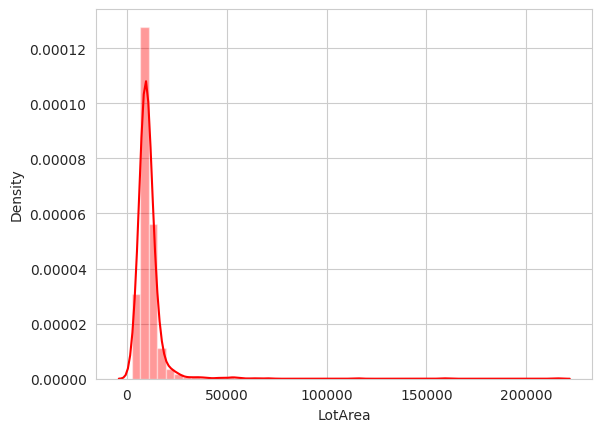

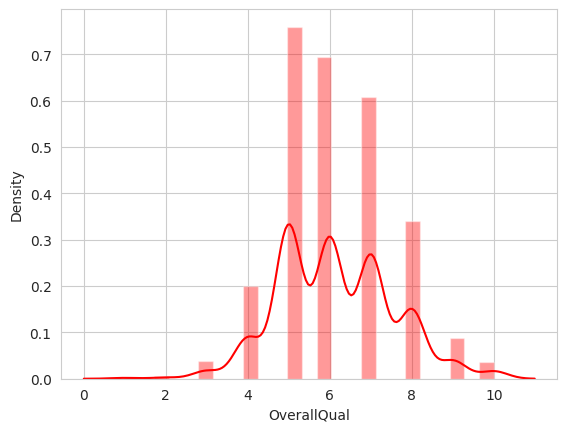

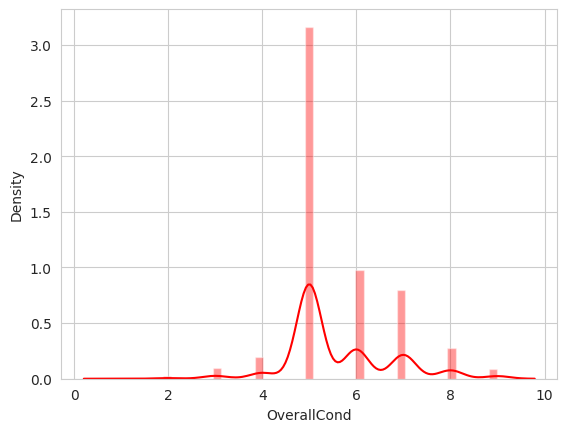

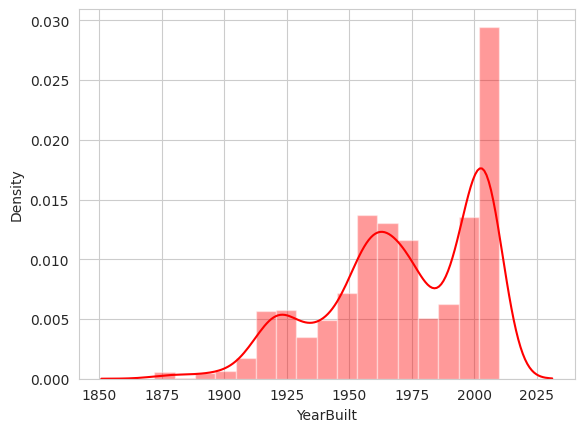

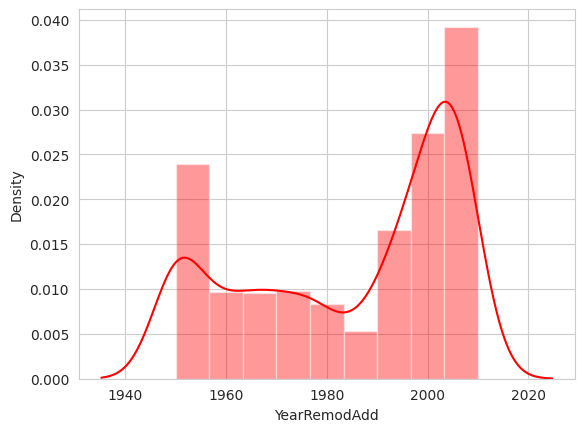

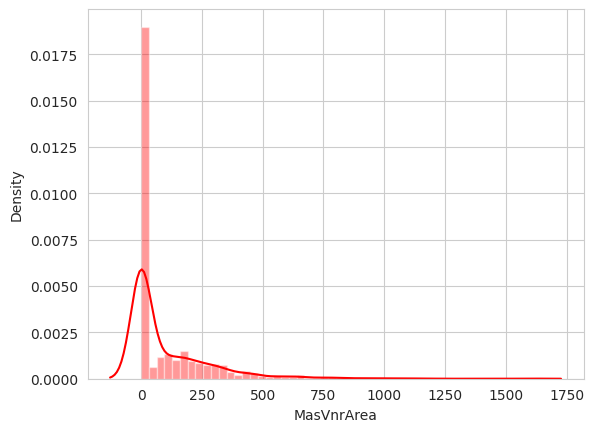

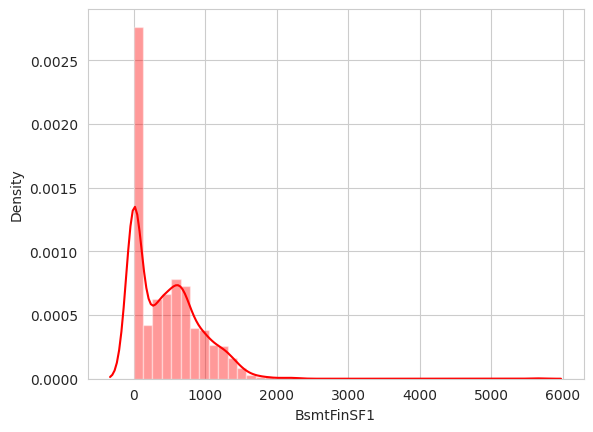

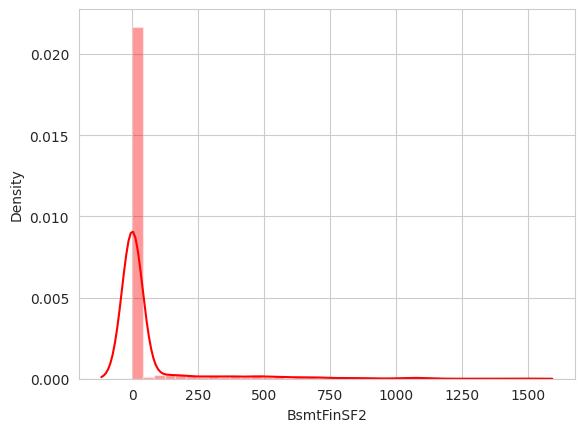

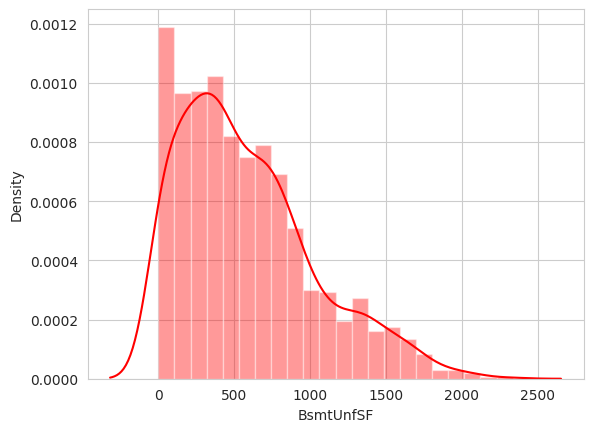

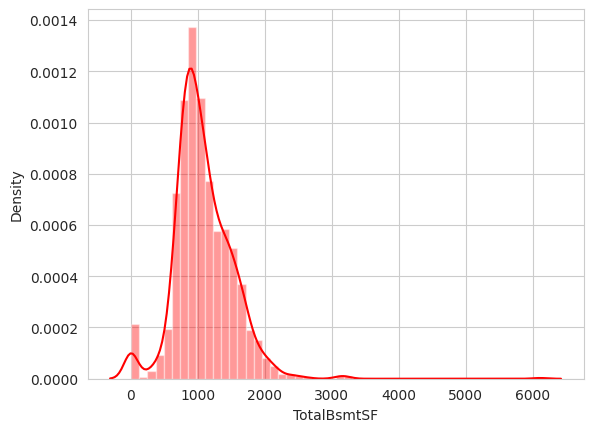

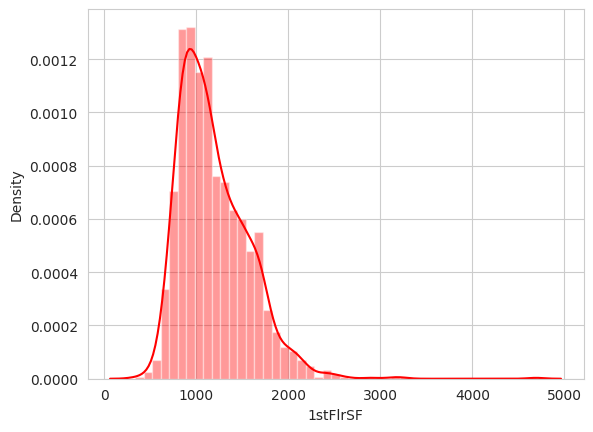

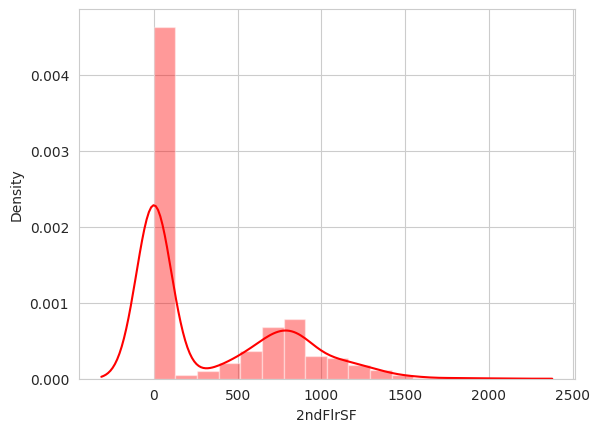

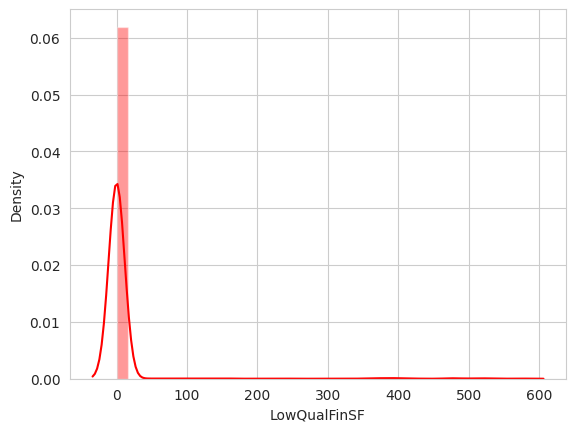

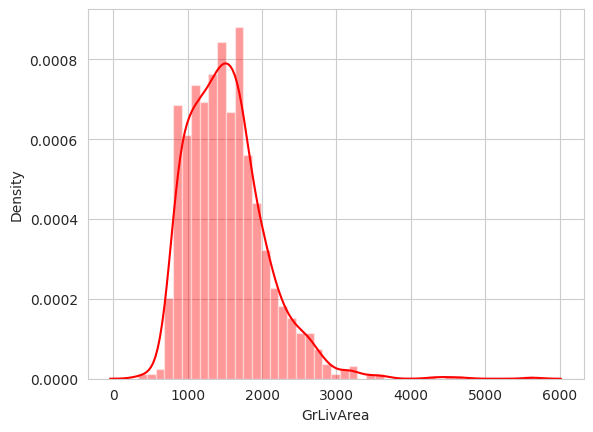

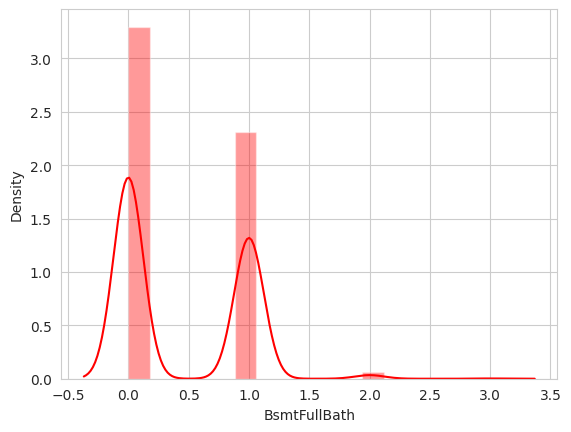

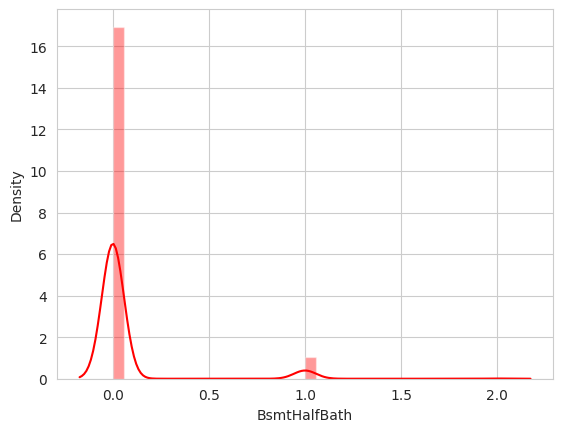

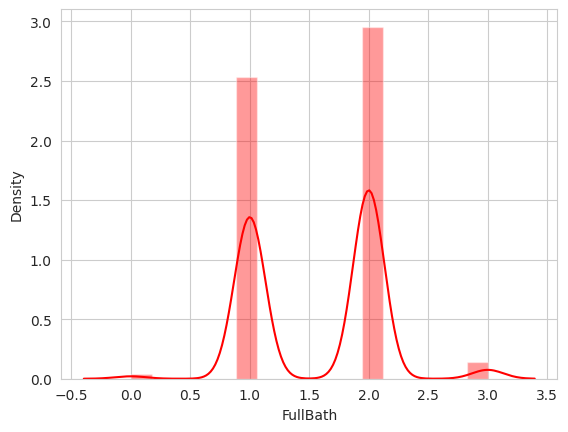

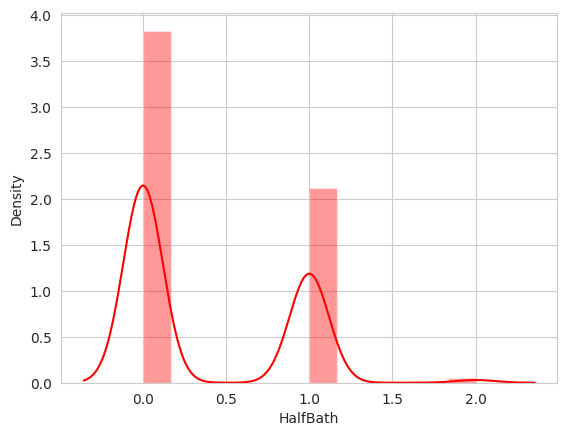

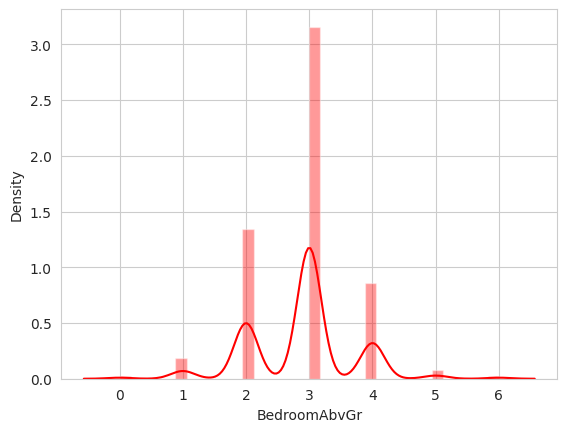

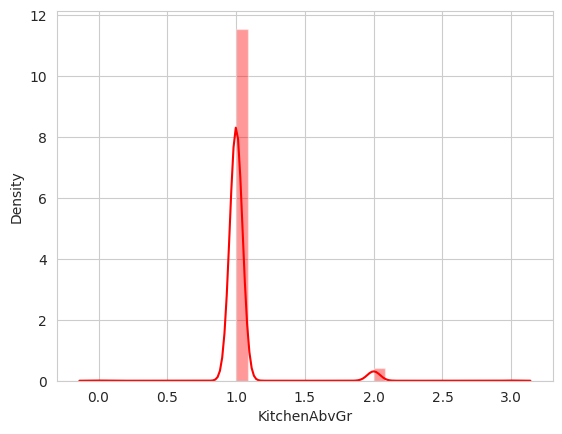

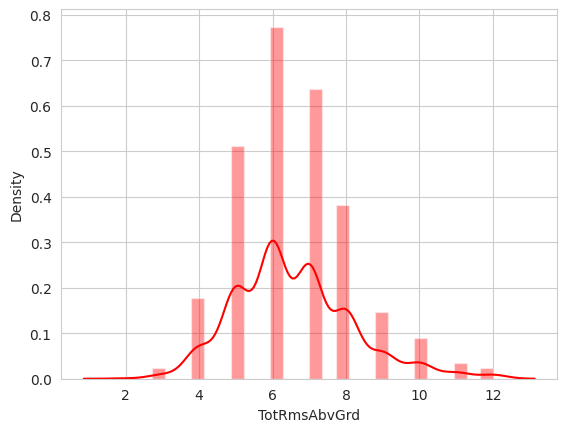

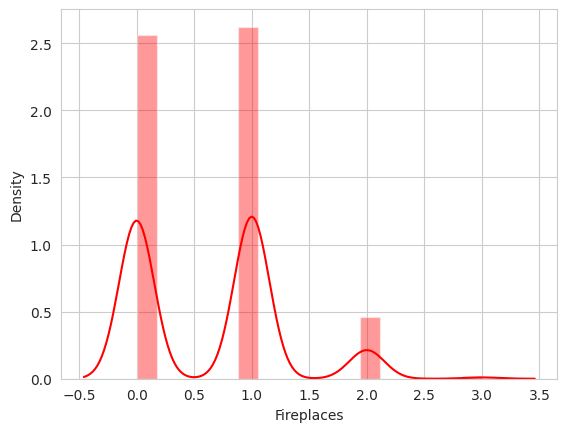

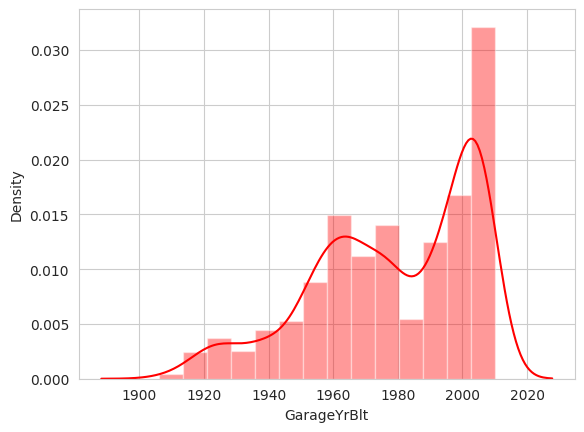

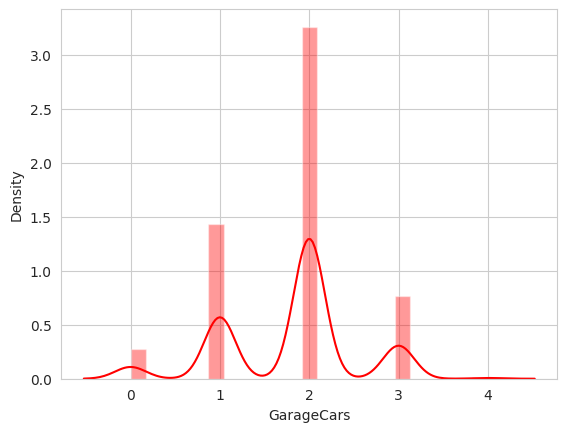

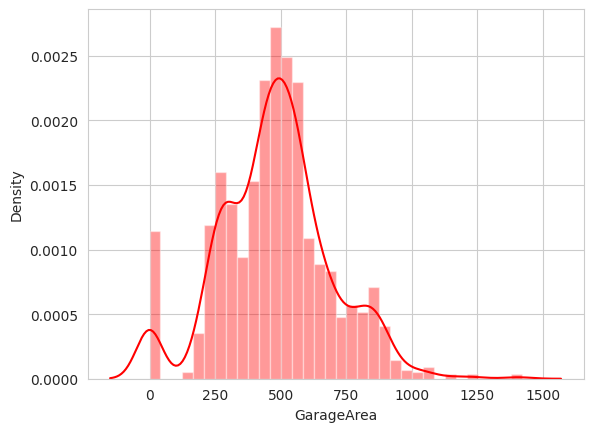

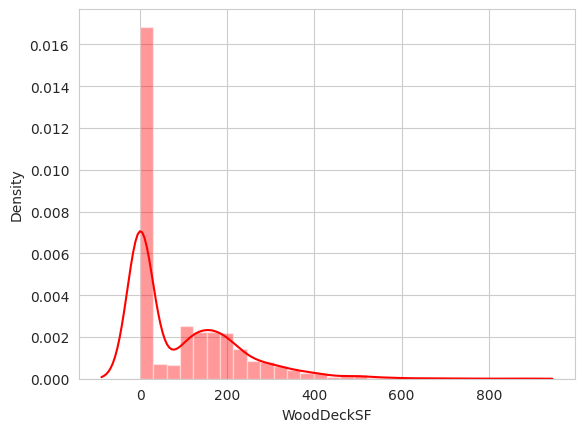

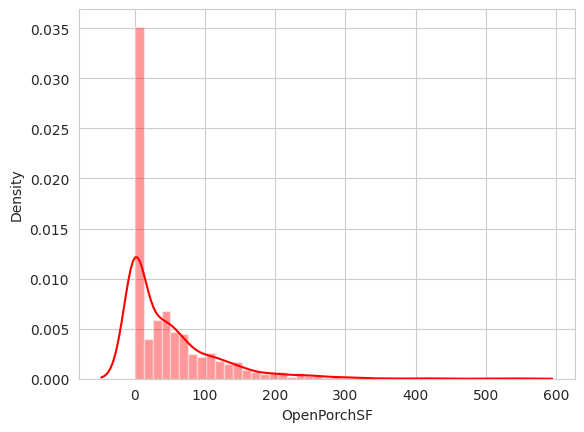

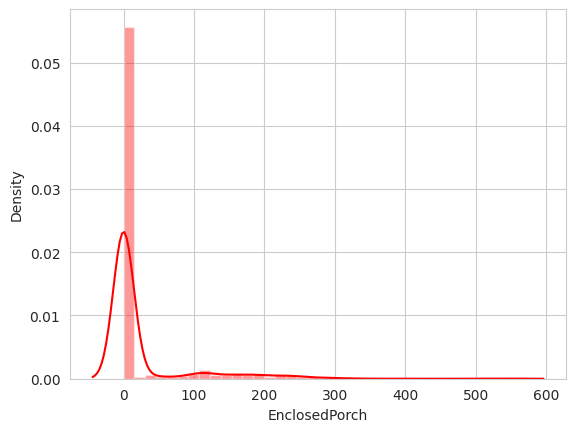

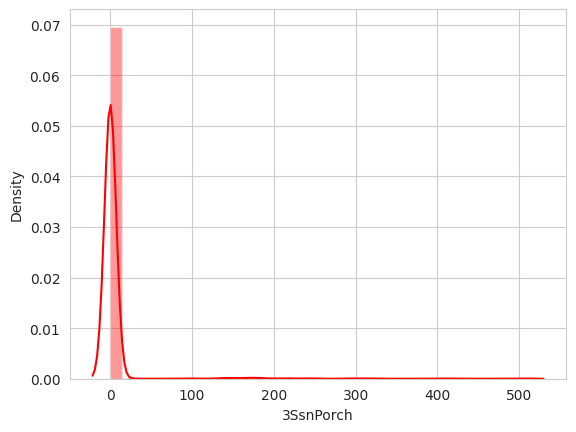

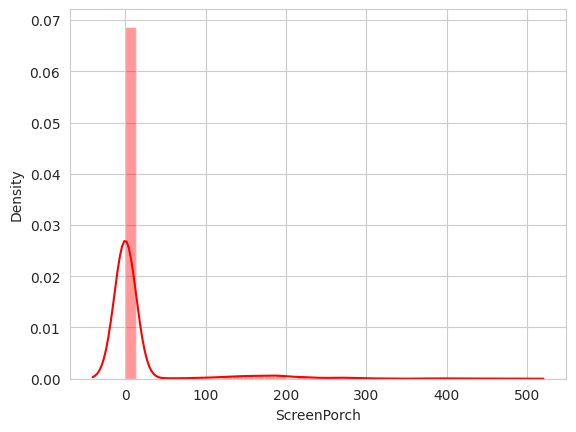

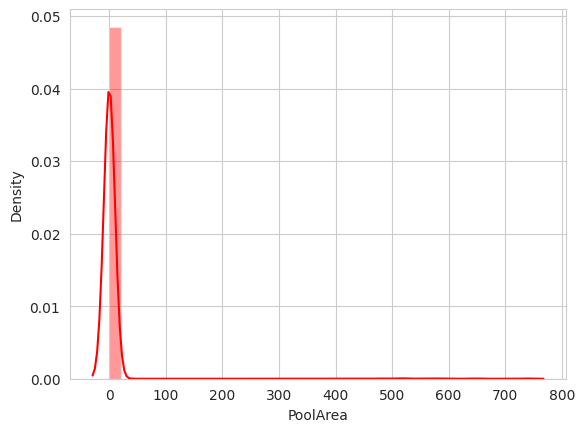

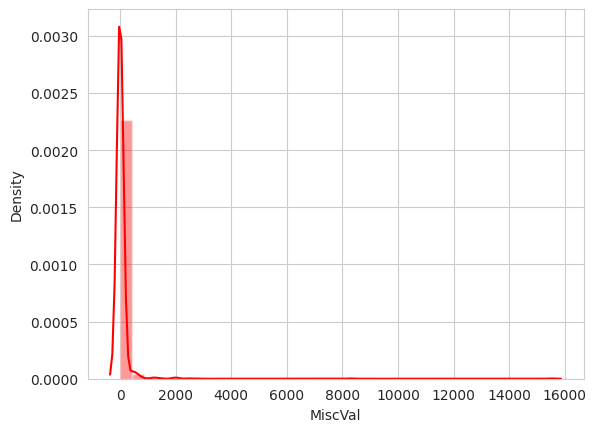

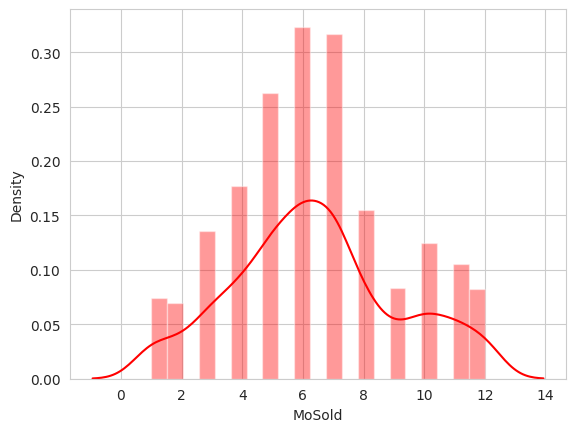

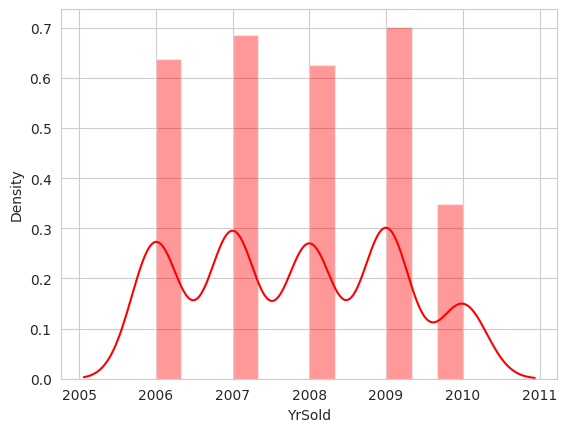

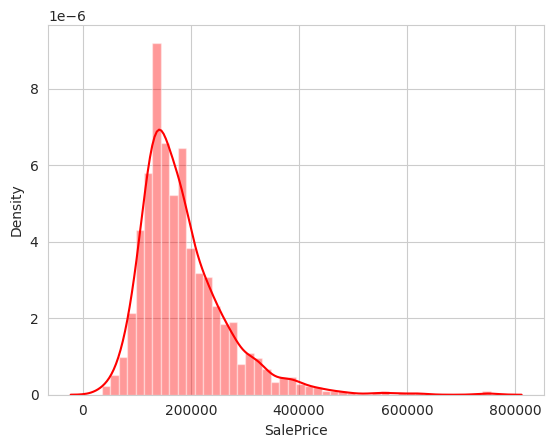

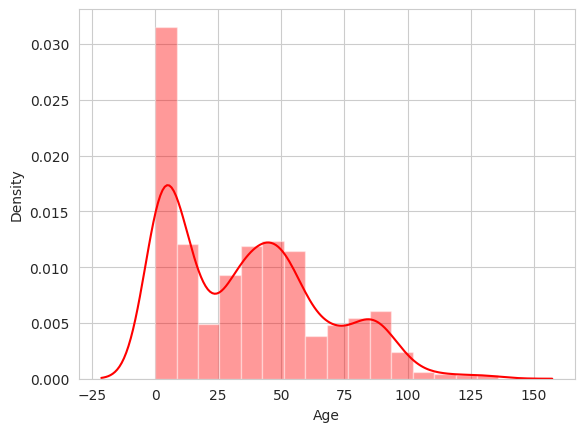

In [54]:
sns.set_style('whitegrid')
for j in num:
    sns.distplot(data1[j], kde = True, color = 'red')
    plt.show()

***Scatter plot to check the correlation of input feature to the target feature. This also helps in uncovering useful and actionable insights from the data.***

***One can also get the outliers from the scatterplots.***

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

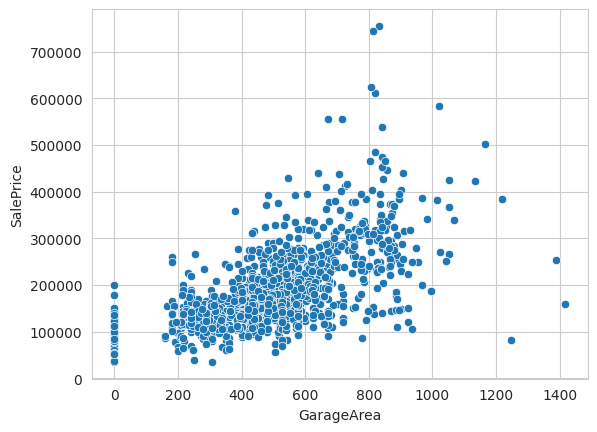

In [55]:
sns.scatterplot(x = data1['GarageArea'], y = data1['SalePrice'], palette='pastel')

***Houses sold in 2008 fetched minimum price. This can be attributed to the Lehman brothers bank crisis.***

<Axes: xlabel='YrSold', ylabel='SalePrice'>

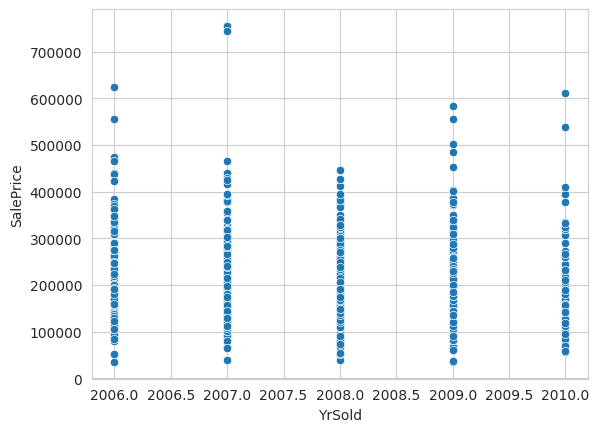

In [56]:
sns.scatterplot(x = data1['YrSold'], y = data1['SalePrice'], palette='pastel')

***Countplot to get the frequency of various classes of categorical features. This also helps us in detecting the minority classes.***

<Axes: xlabel='MSZoning', ylabel='count'>

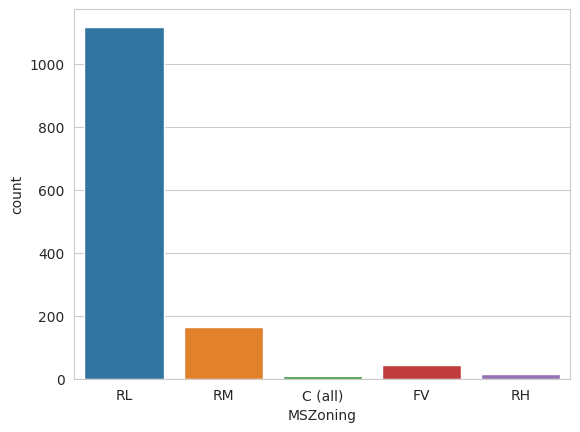

In [57]:
sns.countplot(x = data1['MSZoning'])

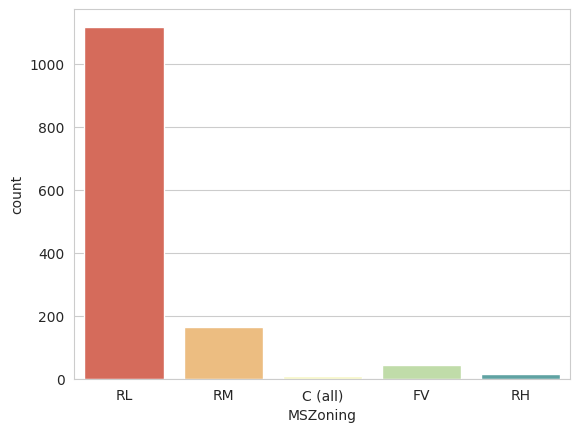

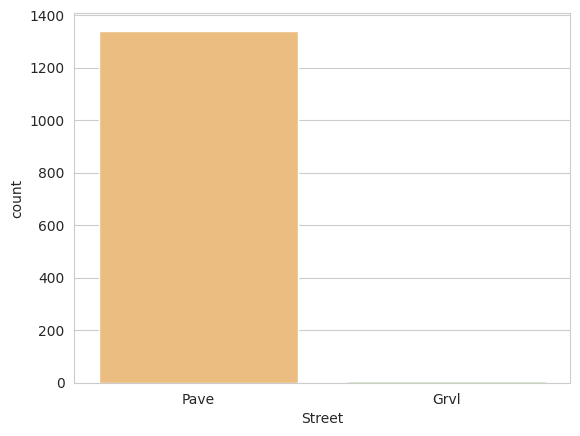

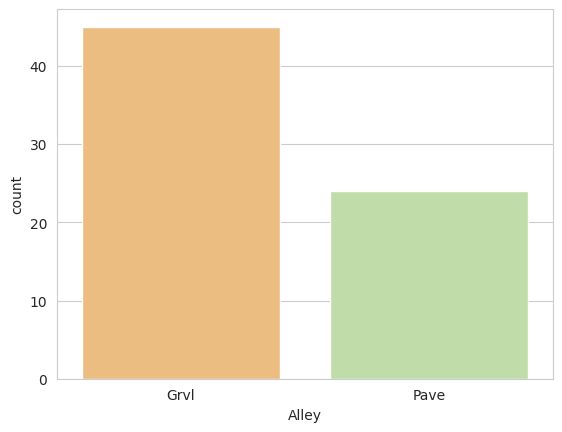

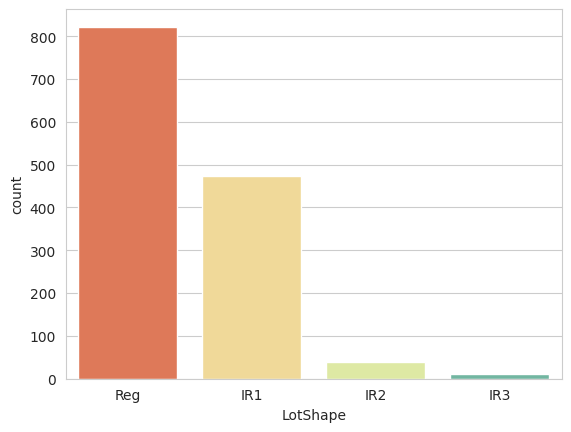

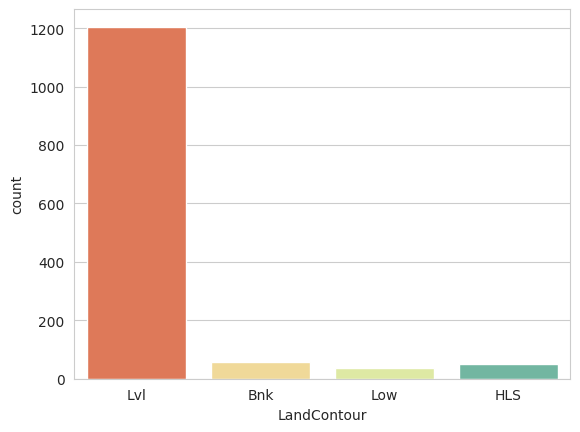

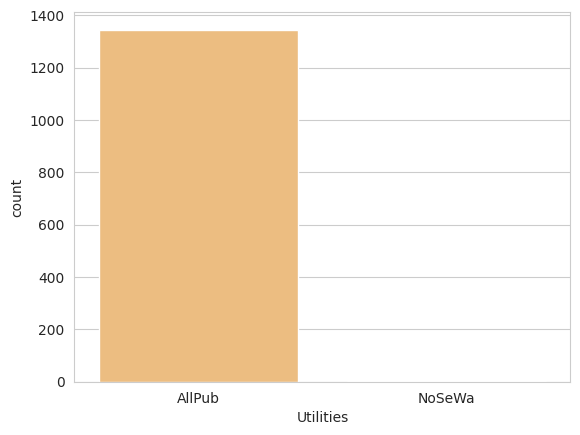

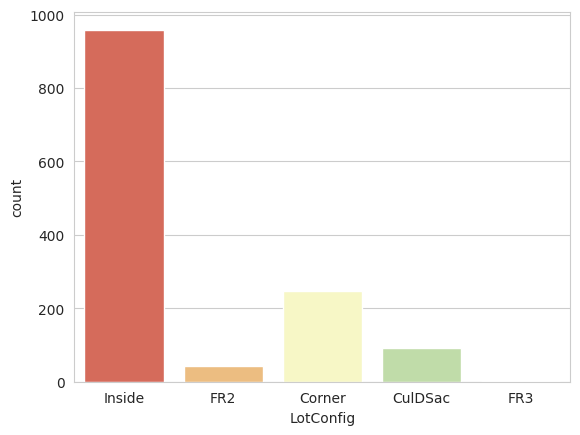

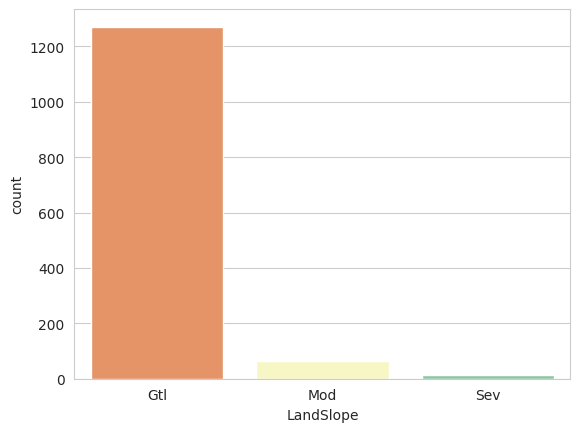

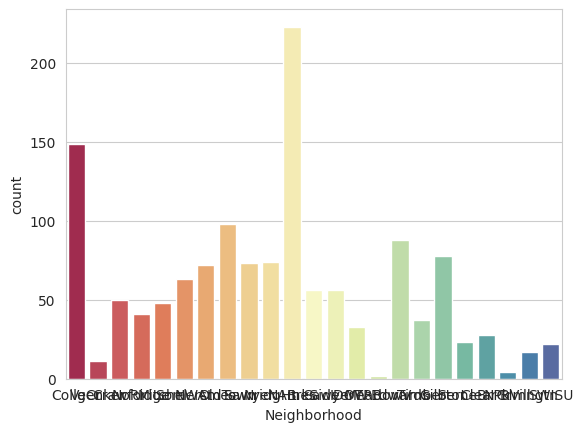

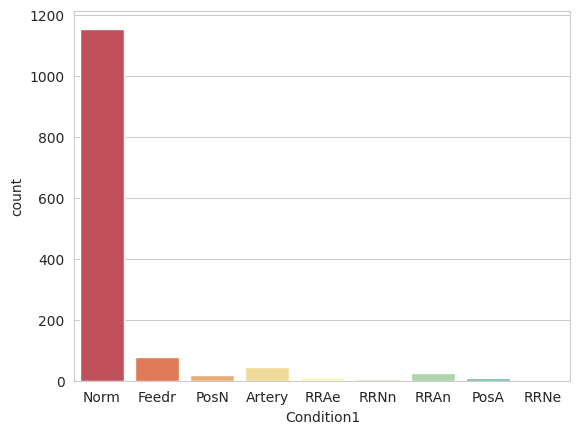

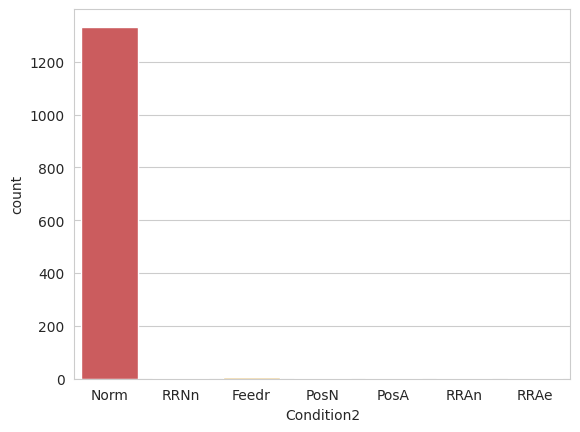

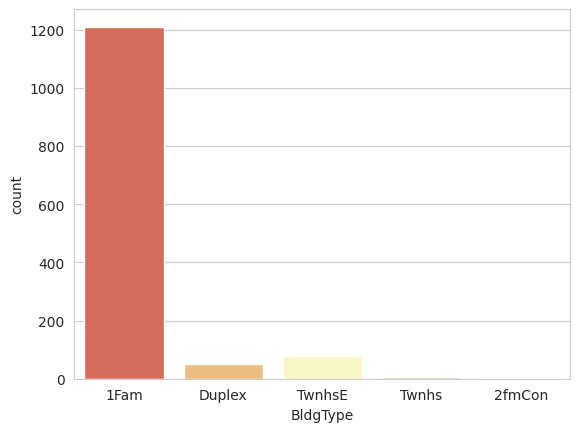

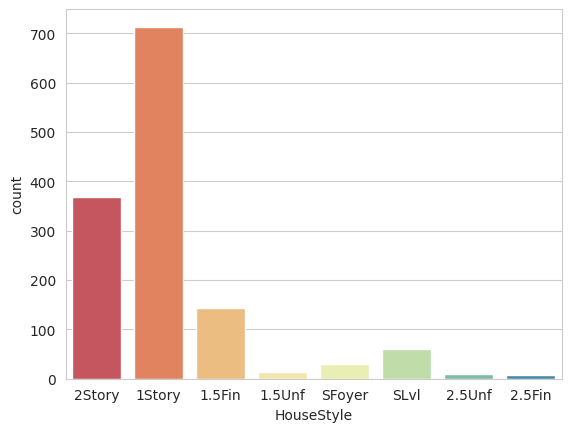

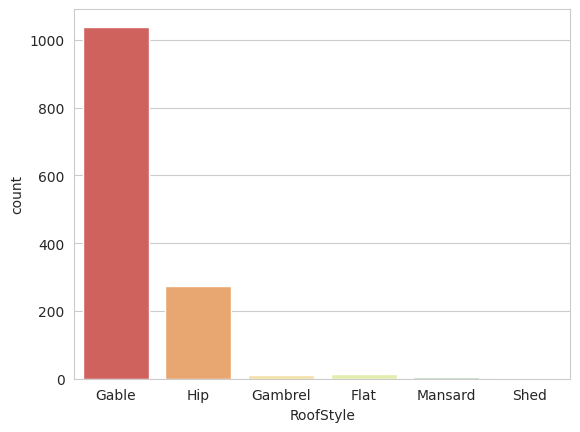

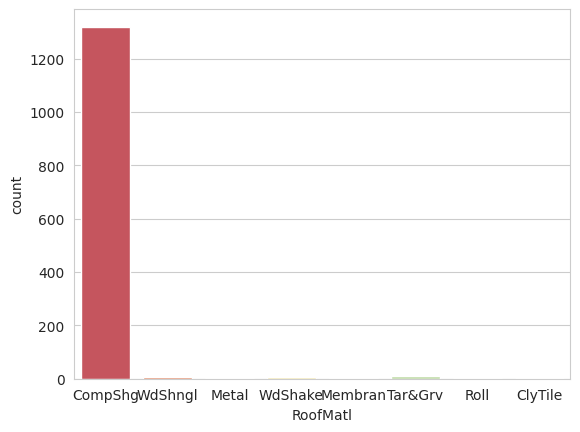

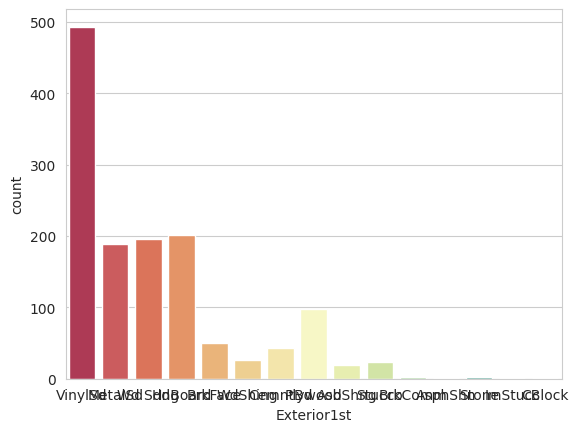

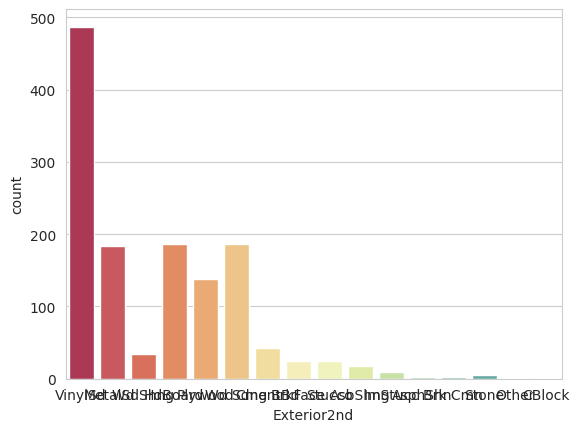

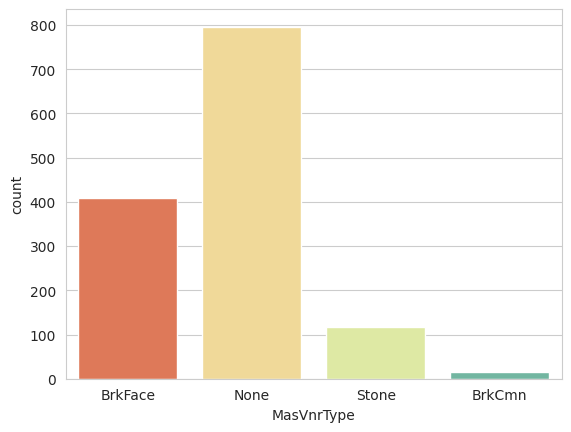

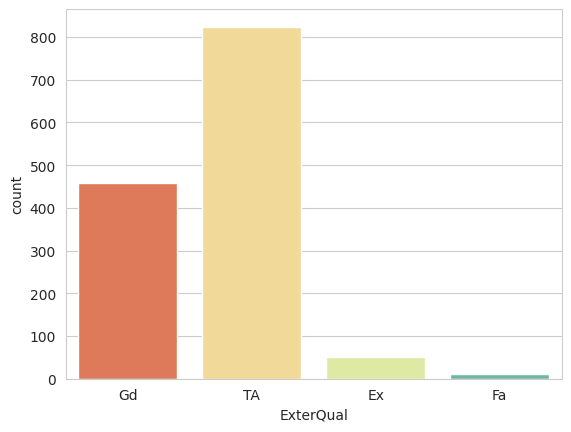

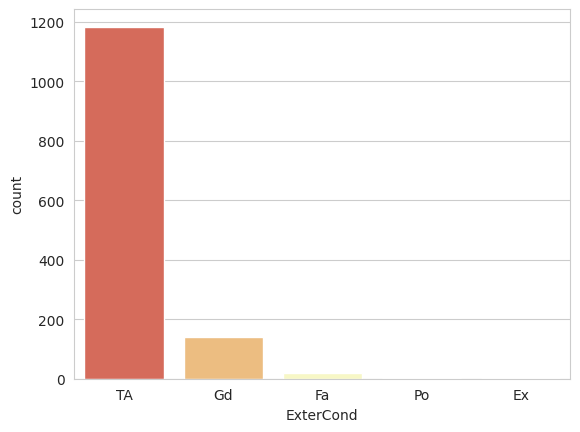

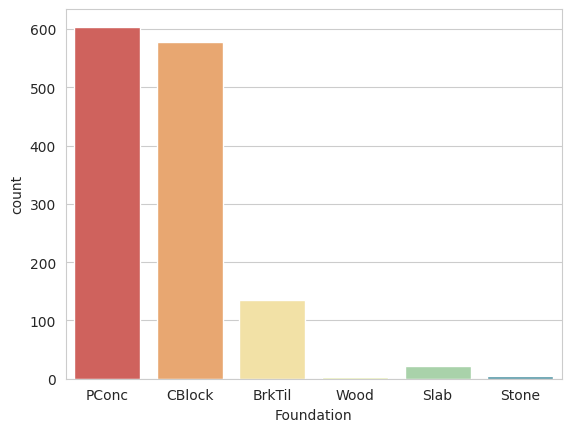

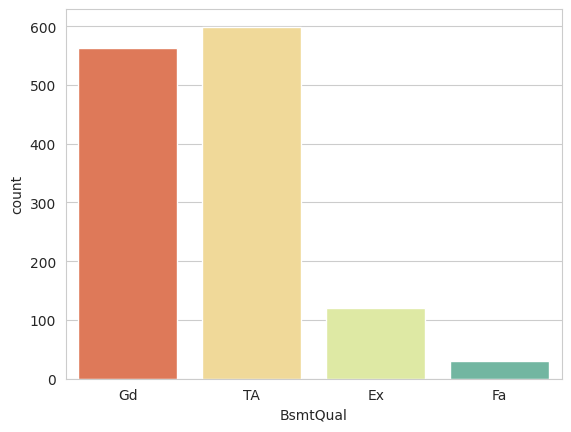

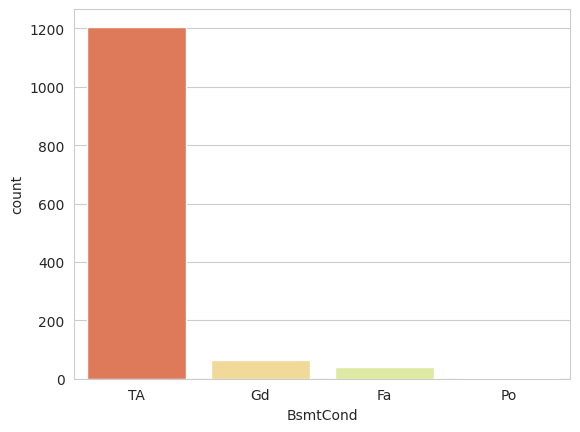

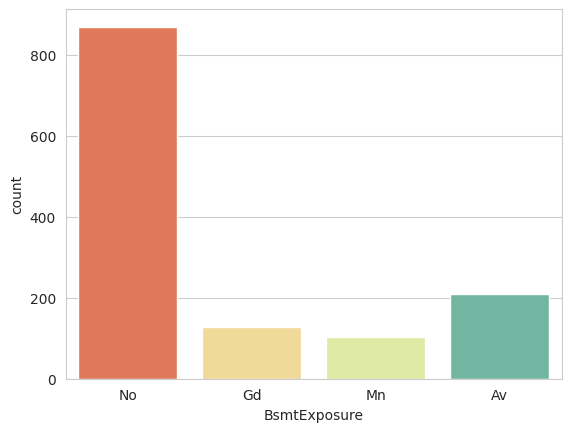

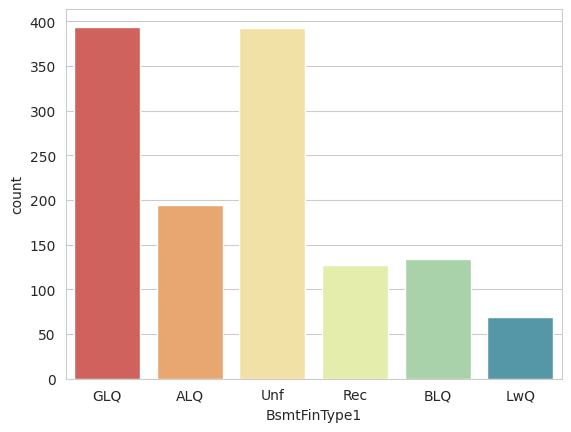

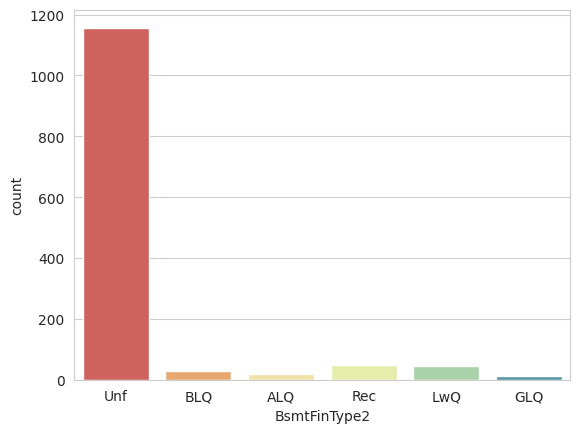

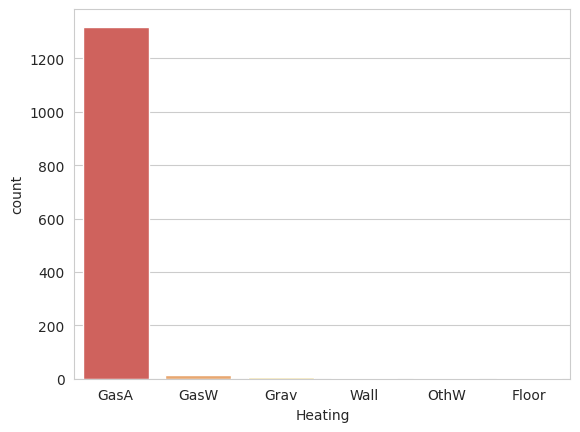

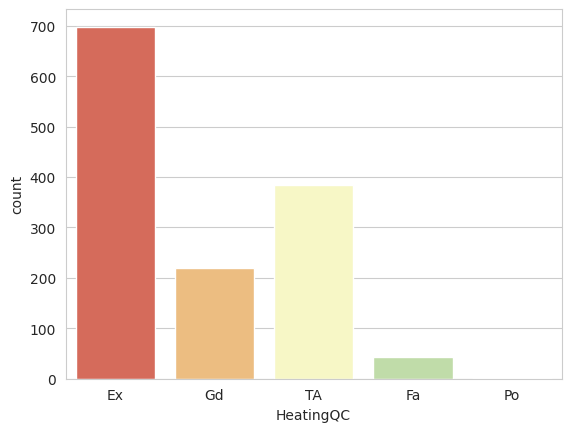

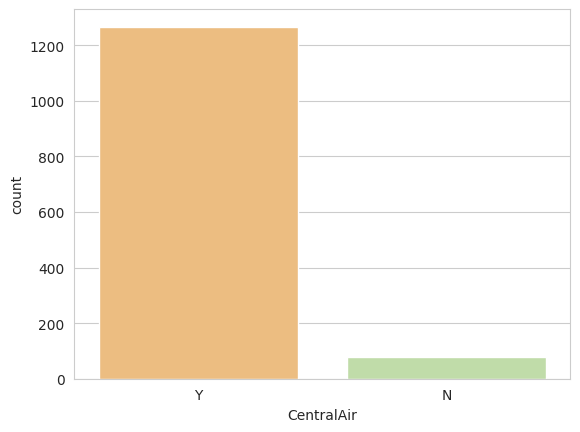

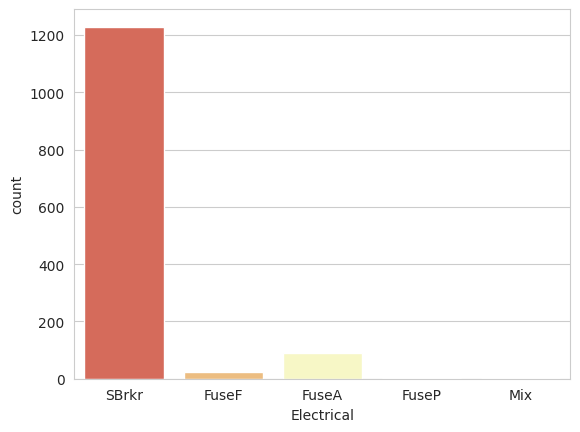

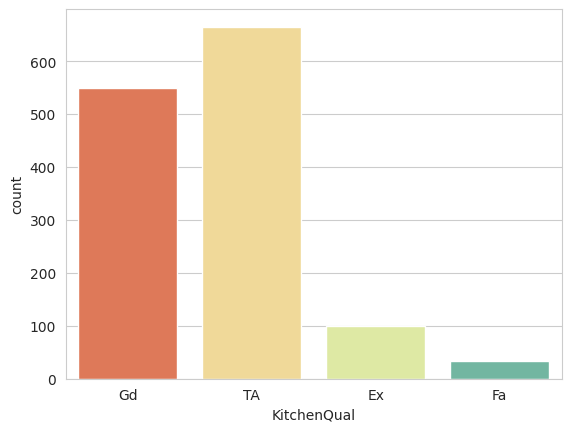

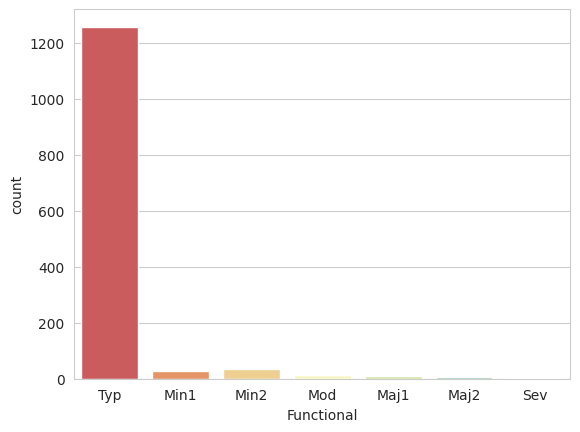

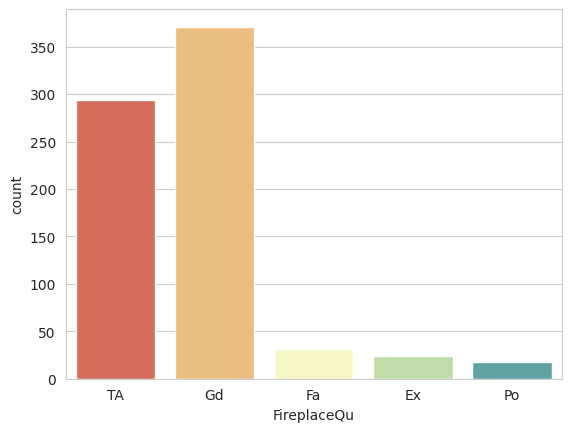

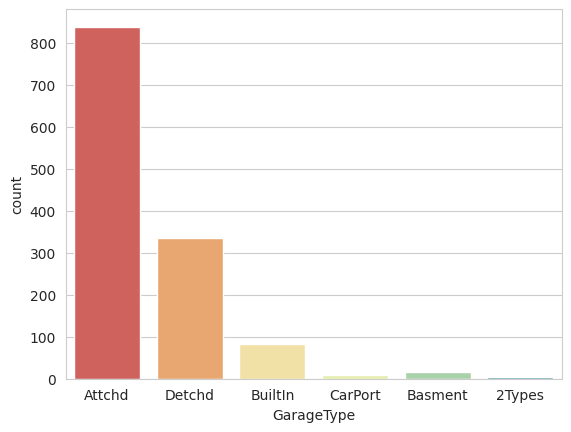

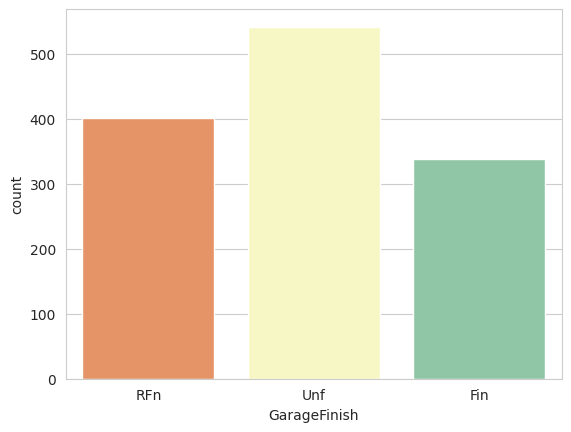

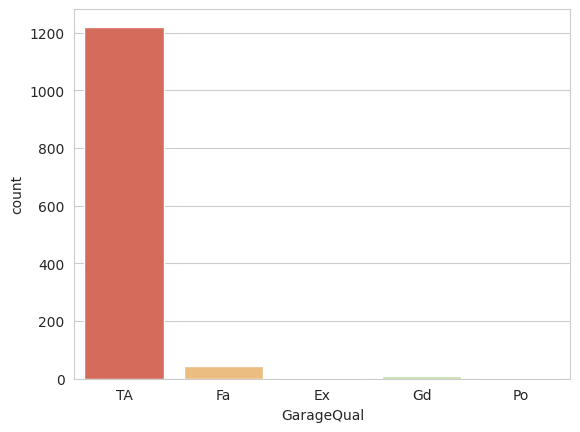

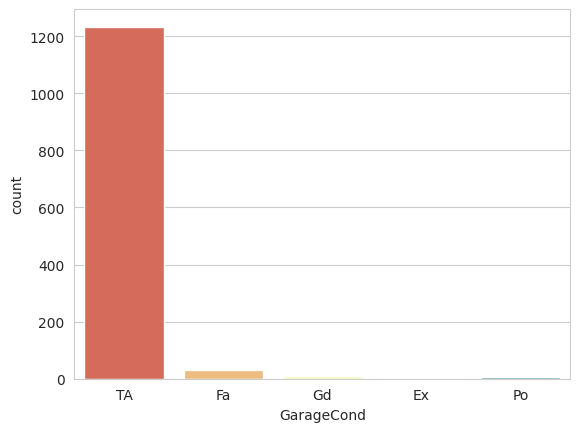

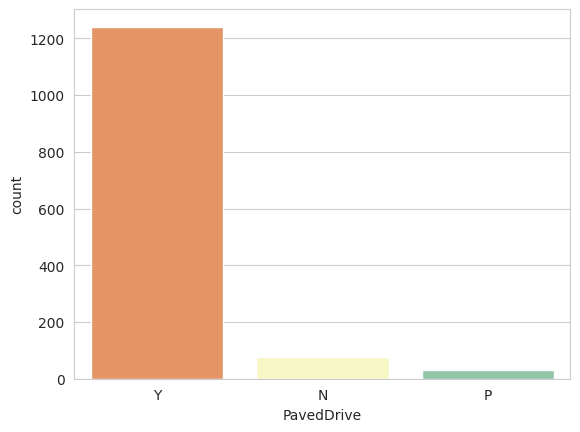

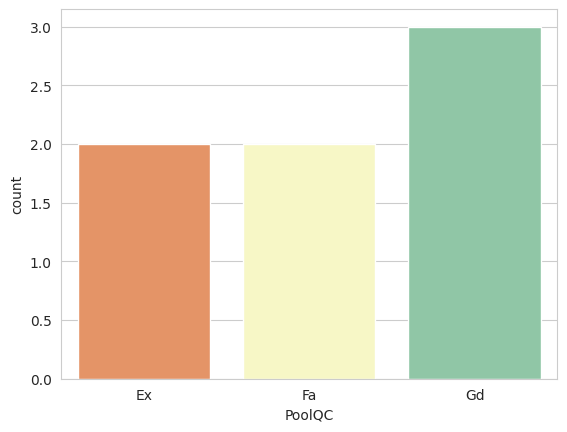

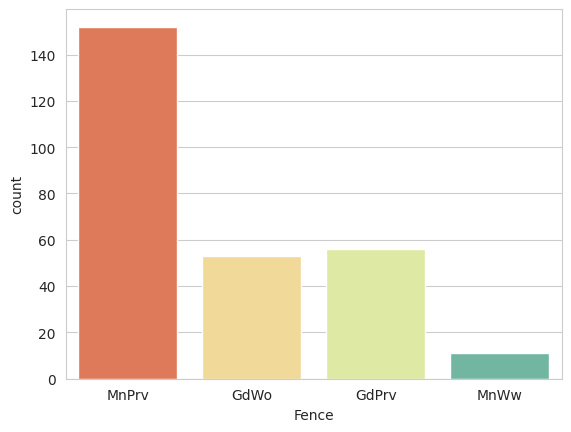

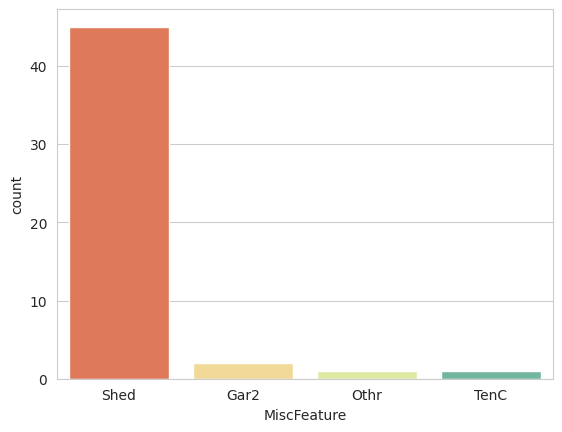

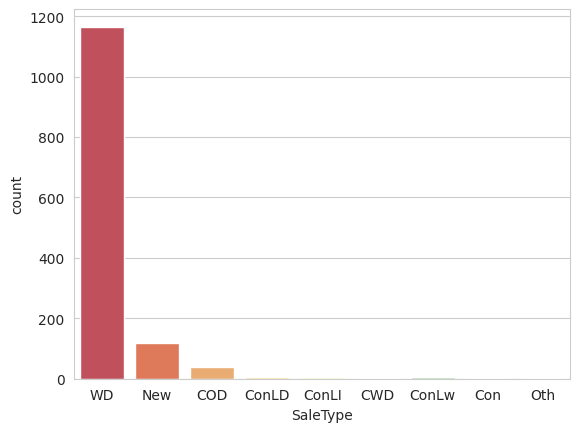

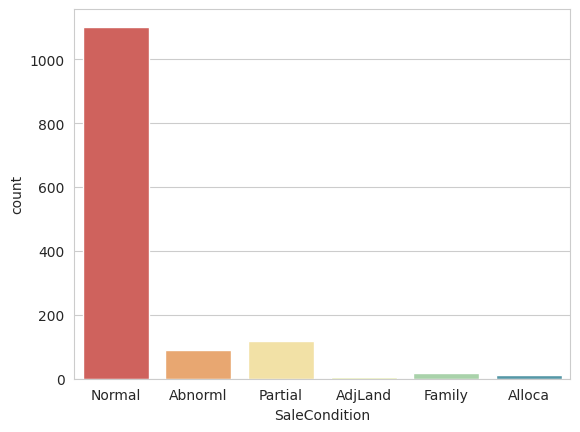

In [58]:
for i in cat:
  sns.countplot(x = data1[i], palette = "Spectral")
  plt.show()

***Properties with Lotshape IR1 are the most expensive folllowed by IR3 and Reg Lotshape is the cheapest. ***

<Axes: xlabel='LotShape', ylabel='SalePrice'>

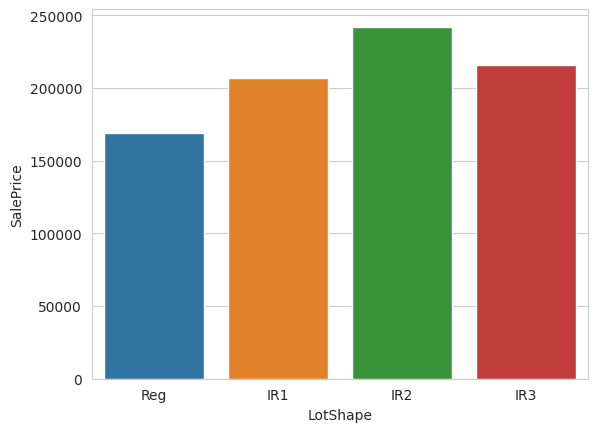

In [59]:
sns.barplot(x = data1['LotShape'], y = data1['SalePrice'], ci = 0)

***1Fam buildingtype is the most expensive along with Twinhouse, whereas 2Family condo is the least expensive.***

<Axes: xlabel='BldgType', ylabel='SalePrice'>

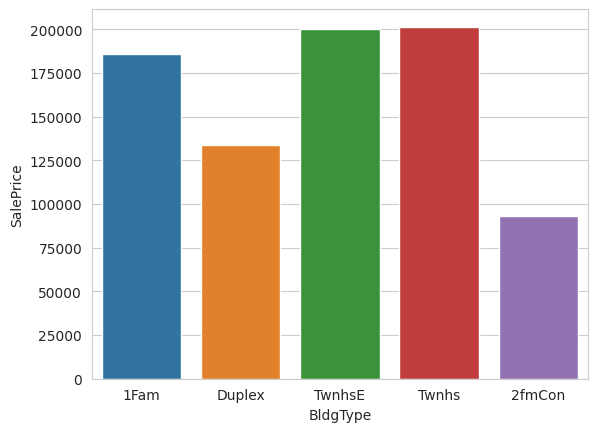

In [60]:
sns.barplot(x = data1['BldgType'], y = data1['SalePrice'], ci = 0)

***Data Preprocessing Stage. In this phase, we will be performing the following steps:-***

***1.   Split the data into train and test. This is necessary in order to check how well the model is performing before shipping the model into production. Also any kind of preprocessing needs to be done after splitting the data into train and test set.***
***2.   Dealing with Missing values. This is another critical aspect of data preprocessing as Machine Learning models cannot deal with Missing values. So we have to either remove them or impute them.***
***3.   Remove the outliers/nonsensical values observed in the EDA phase.***
***4.   Encode the categorical features as Machine Learning models cannot work with categorical data.***
***5.   Scaling the features. This is neccessary as we will have features of different scales (think outliers!) and units. So standardizing/normalizing them will help the model learn better.***

In [61]:
x = data1.drop(['SalePrice'], axis = 1)
y = data1['SalePrice']

In [62]:
from sklearn.model_selection import GridSearchCV, train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 69)

***Separatin numerical and categorical features from train and test set as both will require separate treatment.***

In [63]:
train_num = train_x.select_dtypes(include = 'number')
train_cat = train_x.select_dtypes(include = 'object')

test_num = test_x.select_dtypes(include = 'number')
test_cat = test_x.select_dtypes(include = 'object')

***Missing value imputation. We can also remove the missing values but then it would lead to data loss. So we will impute them using mean, median or mode. For numerical features we can use mean or median and for categorical features we will use mode. ***

In [64]:
print('Missing values before imputation \n', train_cat.isnull().sum())
train_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', train_cat.isnull().sum())

Missing values before imputation 
 MSZoning            0
Street              0
Alley             959
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          5
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           26
BsmtCond           26
BsmtExposure       27
BsmtFinType1       26
BsmtFinType2       27
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       448
GarageType         46
GarageFinish       46
GarageQual         46
GarageCond         46
PavedDrive          0
PoolQC           1006
Fence             817
MiscFeature       974
SaleType            0
SaleCondition       0
dtype: int64


Miss

In [65]:
print('Missing values before imputation \n', train_num.isnull().sum())
train_num.fillna(train_num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', train_num.isnull().sum())

Missing values before imputation 
 MSSubClass         0
LotFrontage      178
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       46
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
Age                0
dtype: int64


Missing values after imputation 
 MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnr

In [66]:
print('Missing values before imputation \n', test_cat.isnull().sum())
test_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', test_cat.isnull().sum())

Missing values before imputation 
 MSZoning           0
Street             0
Alley            318
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         3
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           8
BsmtCond           8
BsmtExposure       8
BsmtFinType1       8
BsmtFinType2       8
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      160
GarageType        18
GarageFinish      18
GarageQual        18
GarageCond        18
PavedDrive         0
PoolQC           333
Fence            257
MiscFeature      323
SaleType           0
SaleCondition      0
dtype: int64


Missing values after imputation 
 MSZoning     

In [67]:
print('Missing values before imputation \n', test_num.isnull().sum())
test_num.fillna(train_num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', test_num.isnull().sum())

Missing values before imputation 
 MSSubClass        0
LotFrontage      68
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        3
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      18
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
Age               0
dtype: int64


Missing values after imputation 
 MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtF

***Encoding the categorical features. Machines cannot work with charatcers/text. They can only understand numbers and digits.***

***Hence we first need to convert the characters and text into numbers and the proceed forward using the concept of Categorical Encoding.***

***There are many encoders we can use. We are going to use OneHotEncoder.***

***OneHotEncoder encodes each category into a new column with values either 0 or 1.***

In [68]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(train_cat)
train_cat = pd.DataFrame(encoder.transform(train_cat), columns = encoder.get_feature_names_out())
test_cat = pd.DataFrame(encoder.transform(test_cat), columns = encoder.get_feature_names_out())

***After encoding the categorical values, we can now concat the numerical and categorical features together into one single dataframe for both the trian and test sets. ***

***But before that we need to reset the index of the train and test set in order to avoid noisy null values.***

In [69]:
train_num.reset_index(inplace = True, drop = True)
train_cat.reset_index(inplace = True, drop = True)
test_num.reset_index(inplace = True, drop = True)
test_cat.reset_index(inplace = True, drop = True)

***Concatenating the numerical and categorical dataframes together.***

In [70]:
train_x1 = pd.concat([train_num, train_cat], axis = 1)
test_x1 = pd.concat([test_num, test_cat], axis = 1) 

***Feature Scaling. Putting the values in the same range/scale so that no feature is dominated by other features.***

***This is needed as the dataset might contain features with different units and ranges. So the data must be normalized/scaled before proceeding further in order to avoid incorrect results.***

***StandardScaler will transform the data such that the transformed data will have mean 0 and standard deviation 1.*** 

***This scaler is used when your dataset shows a normal distribution. ***

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# scaler.fit(train_x1)
# train_x1 = pd.DataFrame(scaler.transform(train_x1), columns = train_x1.columns)
# test_x1 = pd.DataFrame(scaler.transform(test_x1), columns = test_x1.columns)

***MinMaxScaler will transform each data point within the range of [0, 1].***

***This scaler preserves the underlying distribution of your dataset and does not distort it.***

In [72]:
scaler = MinMaxScaler()
scaler.fit(train_x1)
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns = train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns = test_x1.columns)

***RobustScaler is used when your data contains a lot of outliers.***

***When your dataset is heavily skewed, it is advised to use this scaler.***

In [73]:
# scaler = RobustScaler()
# scaler.fit(train_x1)
# train_x1 = pd.DataFrame(scaler.transform(train_x1), columns = train_x1.columns)
# test_x1 = pd.DataFrame(scaler.transform(test_x1), columns = test_x1.columns)

***Now we are ready to train our Machine Learning models! We will be training 5 different models (linear, tree, forest, distance and boosting based models) in order to see which performs the best. ***

In [74]:
!pip install xgboost
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state = 69)
model3 = RandomForestRegressor(random_state = 69)
model4 = KNeighborsRegressor()
model5 = xgb.XGBRegressor()
model6 = SVR()

***Fitting the Linear Regression model.***

In [76]:
model1.fit(train_x1, train_y)

LinearRegression()

***Predicting on the test set using the Linear Regression model.***

In [77]:
pred1 = model1.predict(test_x1)

***Calculating the error for the Linear Regression model.***

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae1 = mean_absolute_error(test_y, pred1)

In [79]:
mae1

362248205609008.6

***DecisionTreeRegressor***

In [80]:
model2.fit(train_x1, train_y)
pred2 = model2.predict(test_x1)

mae2 = mean_absolute_error(test_y, pred2)

mae2

29677.094955489614

***RandomForestRegressor***

In [81]:
model3.fit(train_x1, train_y)
pred3 = model3.predict(test_x1)

mae3 = mean_absolute_error(test_y, pred3)

mae3

18926.1021958457

***KNNRegressor***

In [82]:
model4.fit(train_x1, train_y)
pred4 = model4.predict(test_x1)

mae4 = mean_absolute_error(test_y, pred4)

mae4

26322.66765578635

***XGBRegressor***

In [83]:
model5.fit(train_x1, train_y)
pred5 = model5.predict(test_x1)

mae5 = mean_absolute_error(test_y, pred5)

mae5

19100.55765485905

In [84]:
model6.fit(train_x1, train_y)
pred6 = model6.predict(test_x1)

mae6 = mean_absolute_error(test_y, pred6)

mae6

54629.64035120385

***Base model score is 2030517400638875.8 for Linear Regression, 28315.71 for Decision Tree Regressor, 18916.22 for Random Forest Regressor and 26654.95 for KNN Regressor, 19490.79 for XGBRegressor and 54643.78 for SVMRegressor. Now we will implement Hyperparameter Tuning using GridSearcCV in order to improve the score!***

***Hyperparameter Tuning using GridSearchCV.***

In [85]:
DTR_params = [{'max_depth': [3, 6, 9, 12], 'max_features': [3, 6, 9]}]

dtr = GridSearchCV(model2, DTR_params, cv = 5, scoring='neg_mean_absolute_error')
dtr.fit(train_x1, train_y)

print(dtr.best_params_)
print(-(dtr.best_score_))

{'max_depth': 12, 'max_features': 6}
35359.42066969235


In [86]:
RFR_params = [{'n_estimators': [5, 10, 15, 20], 'max_depth': [3, 6, 9, 12]}]

rfr = GridSearchCV(model3, RFR_params, cv = 5, scoring='neg_mean_absolute_error')
rfr.fit(train_x1, train_y)

print(rfr.best_params_)
print(-(rfr.best_score_))

{'max_depth': 12, 'n_estimators': 20}
19512.820733515728


In [87]:
KNN_params = [{'n_neighbors': [3, 6, 9, 12], 'weights': ['uniform', 'distance']}]

knn = GridSearchCV(model4, KNN_params, cv = 5, scoring='neg_mean_absolute_error')
knn.fit(train_x1, train_y)

print(knn.best_params_)
print(-(knn.best_score_))

{'n_neighbors': 9, 'weights': 'distance'}
26769.098121503932


In [88]:
xgb_params = [{'eta': [0.1, 0.2, 0.3], 'max_depth': [3, 6, 9]}]

gb = GridSearchCV(model5, xgb_params, cv = 5, scoring='neg_mean_absolute_error')
gb.fit(train_x1, train_y)

print(gb.best_params_)
print(-(gb.best_score_))

{'eta': 0.1, 'max_depth': 3}
16785.655577369187


In [89]:
svm_params = [{'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 0.2, 0.3]}]

svm = GridSearchCV(model6, svm_params, cv = 5, scoring='neg_mean_absolute_error')
svm.fit(train_x1, train_y)

print(svm.best_params_)
print(-(svm.best_score_))

{'C': 0.3, 'kernel': 'linear'}
57394.156042714625


***Now we have trained our models and tested them on the test set to validate the results. How can we further increase the accuracy?***

***One way to achieve this by removing noisy/unneccessary features from the set and keeping only the relevent features. This process is known as Feature Selection. There are many ways through which we can do this.***

***One way is to manually look and find features which are noise features. Although widely used, it required manual effort and domain knowledge which not everyone has.***

***Another approach is an automated appproach. This approach is preferred and widely used. There are many techniques which can be used to find the important features.***

***Feature Selection (Removing high NaN value features)***

***Remove features with high percentage of NaN values, as they do not contain enogh information for the model to learn. ***

In [90]:
nan_feat = [cname for cname in data2.columns if data2[cname].isnull().sum() >= 1]

# TO FIND OUT THE % OF NAN 
for i in nan_feat:
    print(i, np.round(data2[i].isnull().mean(), 2))

LotFrontage 0.18
Alley 0.94
MasVnrType 0.01
MasVnrArea 0.01
BsmtQual 0.02
BsmtCond 0.02
BsmtExposure 0.03
BsmtFinType1 0.02
BsmtFinType2 0.03
Electrical 0.0
FireplaceQu 0.47
GarageType 0.05
GarageYrBlt 0.05
GarageFinish 0.05
GarageQual 0.05
GarageCond 0.05
PoolQC 1.0
Fence 0.81
MiscFeature 0.96


***Feature Selection (Variance Threshold)***

***In this method, we remove the features with low variance, as they do not contribute in the outcome prediction and only increase the dimensionality of the data thus increasing the time execution.***

In [91]:
cat_data = data2.select_dtypes(include = 'object')
pd.crosstab(cat_data['Street'], columns = 'counts', normalize = True)

col_0,counts
Street,
Grvl,0.004107
Pave,0.995893


In [92]:
list1 = []
for i in cat_data.columns:
    list1.append((i, pd.crosstab(cat_data[i], columns = 'counts', normalize = True)))

In [93]:
list1

[('MSZoning',
  col_0       counts
  MSZoning          
  C (all)   0.006845
  FV        0.043806
  RH        0.010951
  RL        0.791239
  RM        0.147159),
 ('Street',
  col_0     counts
  Street          
  Grvl    0.004107
  Pave    0.995893),
 ('Alley',
  col_0    counts
  Alley          
  Grvl   0.544444
  Pave   0.455556),
 ('LotShape',
  col_0       counts
  LotShape          
  IR1       0.333333
  IR2       0.028063
  IR3       0.006845
  Reg       0.631759),
 ('LandContour',
  col_0          counts
  LandContour          
  Bnk          0.042437
  HLS          0.034223
  Low          0.024641
  Lvl          0.898700),
 ('Utilities',
  col_0        counts
  Utilities          
  AllPub     0.999316
  NoSeWa     0.000684),
 ('LotConfig',
  col_0        counts
  LotConfig          
  Corner     0.179329
  CulDSac    0.064339
  FR2        0.033539
  FR3        0.002738
  Inside     0.720055),
 ('LandSlope',
  col_0        counts
  LandSlope          
  Gtl        0.946612


***Feature Selection (Correlation based)***

***Check the linear correlation of the features to detect important ones.***

In [94]:
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386970,-0.140204,0.029215,-0.058640,0.022406,0.036155,0.020924,-0.070292,-0.065841,-0.140300,-0.239334,-0.253094,0.304190,0.045936,0.071383,0.005437,-0.005633,0.126832,0.175551,-0.027190,0.285237,0.036852,-0.041339,0.079530,-0.043940,-0.103259,-0.015316,-0.007651,-0.011567,-0.043641,-0.026597,0.008024,-0.006859,-0.019816,-0.018077,-0.087284
LotFrontage,-0.386970,1.000000,0.426891,0.251937,-0.058561,0.126156,0.090753,0.195539,0.236045,0.050986,0.129841,0.393714,0.457610,0.080465,0.038619,0.403567,0.101922,-0.005461,0.198614,0.054553,0.263531,-0.010612,0.351974,0.263875,0.072180,0.287997,0.347545,0.090400,0.152810,0.005554,0.072310,0.041695,0.206251,0.004648,0.015889,0.004589,0.353502
LotArea,-0.140204,0.426891,1.000000,0.105455,-0.006480,0.014888,0.014200,0.105924,0.213482,0.111224,-0.003005,0.260668,0.299291,0.051172,0.004661,0.263081,0.157673,0.047289,0.125660,0.015183,0.120312,-0.019115,0.189722,0.269535,-0.024227,0.154959,0.180599,0.171538,0.084328,-0.019506,0.022131,0.043657,0.077601,0.038359,0.002714,-0.013760,0.263512
OverallQual,0.029215,0.251937,0.105455,1.000000,-0.092090,0.570123,0.551546,0.411750,0.240979,-0.060263,0.304118,0.536393,0.476225,0.297097,-0.031173,0.594576,0.114302,-0.041660,0.553818,0.271094,0.104382,-0.181923,0.431469,0.396585,0.547025,0.601875,0.562494,0.241835,0.307266,-0.107878,0.022725,0.061846,0.064677,-0.030169,0.071688,-0.028658,0.790975
OverallCond,-0.058640,-0.058561,-0.006480,-0.092090,1.000000,-0.375386,0.067433,-0.125485,-0.047632,0.040780,-0.136310,-0.172357,-0.143885,0.026541,0.025549,-0.081334,-0.060037,0.123562,-0.195381,-0.058751,0.014852,-0.085233,-0.059000,-0.022511,-0.326928,-0.186938,-0.153213,-0.000315,-0.033467,0.066376,0.020872,0.058315,-0.001962,0.068289,-0.005177,0.045877,-0.078669
YearBuilt,0.022406,0.126156,0.014888,0.570123,-0.375386,1.000000,0.597640,0.319811,0.251461,-0.050106,0.145547,0.390879,0.280991,0.010160,-0.184836,0.197962,0.187643,-0.038811,0.467929,0.244800,-0.070932,-0.183415,0.095700,0.142608,0.824084,0.532254,0.475828,0.224252,0.186465,-0.390106,0.034848,-0.048950,0.004621,-0.031227,0.019572,-0.015426,0.523201
YearRemodAdd,0.036155,0.090753,0.014200,0.551546,0.067433,0.597640,1.000000,0.185019,0.129753,-0.066910,0.177555,0.290056,0.239719,0.140606,-0.062561,0.287513,0.120648,-0.013695,0.436659,0.188749,-0.037710,-0.158499,0.192169,0.107873,0.642735,0.419896,0.372293,0.207075,0.225122,-0.199830,0.047059,-0.035263,0.005781,-0.008842,0.024490,0.036410,0.509081
MasVnrArea,0.020924,0.195539,0.105924,0.411750,-0.125485,0.319811,0.185019,1.000000,0.270786,-0.071834,0.110175,0.367329,0.348254,0.171950,-0.069338,0.391557,0.091190,0.025445,0.281520,0.197339,0.103753,-0.039078,0.280853,0.243737,0.255689,0.369184,0.377535,0.161807,0.128980,-0.108869,0.014236,0.056217,0.011911,-0.029063,-0.003799,-0.006784,0.480492
BsmtFinSF1,-0.070292,0.236045,0.213482,0.240979,-0.047632,0.251461,0.129753,0.270786,1.000000,-0.052076,-0.498136,0.520743,0.444517,-0.136088,-0.065564,0.207480,0.647218,0.068140,0.061255,0.003841,-0.106054,-0.079637,0.046419,0.257855,0.154922,0.223545,0.297326,0.204003,0.109382,-0.103667,0.028895,0.060804,0.139774,0.004678,-0.012205,0.014152,0.387234
BsmtFinSF2,-0.065841,0.050986,0.111224,-0.060263,0.040780,-0.050106,-0.066910,-0.071834,-0.052076,1.000000,-0.207701,0.104523,0.098129,-0.099971,0.014903,-0.009693,0.156299,0.069949,-0.076319,-0.031665,-0.014715,-0.041225,-0.035078,0.045845,-0.088200,-0.039768,-0.019491,0.068112,0.003035,0.035386,-0.030853,0.090027,0.041769,0.005184,-0.014849,0.033595,-0.012058


***Select the best features with the help of various algorithms like chi2, mutual information and more.***

***We just need to specify the algorithm and the number of top features required.***

In [95]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func = chi2, k = 10)
selector.fit(train_x1, train_y)
train_x1.columns[selector.get_support()]

Index(['MSZoning_C (all)', 'LotShape_IR3', 'Condition2_PosN',
       'RoofMatl_WdShngl', 'Exterior2nd_Other', 'ExterQual_Ex', 'PoolQC_Gd',
       'MiscFeature_Gar2', 'SaleType_Con', 'SaleCondition_Alloca'],
      dtype='object')

***Feature Importance using Random Forest model***

In [96]:
rf_model = RandomForestRegressor(random_state=69)

rf_model.fit(train_x1, train_y)

RandomForestRegressor(random_state=69)

In [97]:
feature_scores = pd.Series(rf_model.feature_importances_, index=train_x1.columns).sort_values(ascending=False)

In [98]:
feature_scores[:10]

OverallQual     0.579655
GrLivArea       0.121681
TotalBsmtSF     0.042968
BsmtFinSF1      0.023110
1stFlrSF        0.023034
FullBath        0.022858
2ndFlrSF        0.017858
TotRmsAbvGrd    0.016609
GarageArea      0.013910
LotArea         0.012396
dtype: float64

In [99]:
feature_scores.index[:10]

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF',
       'FullBath', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'LotArea'],
      dtype='object')

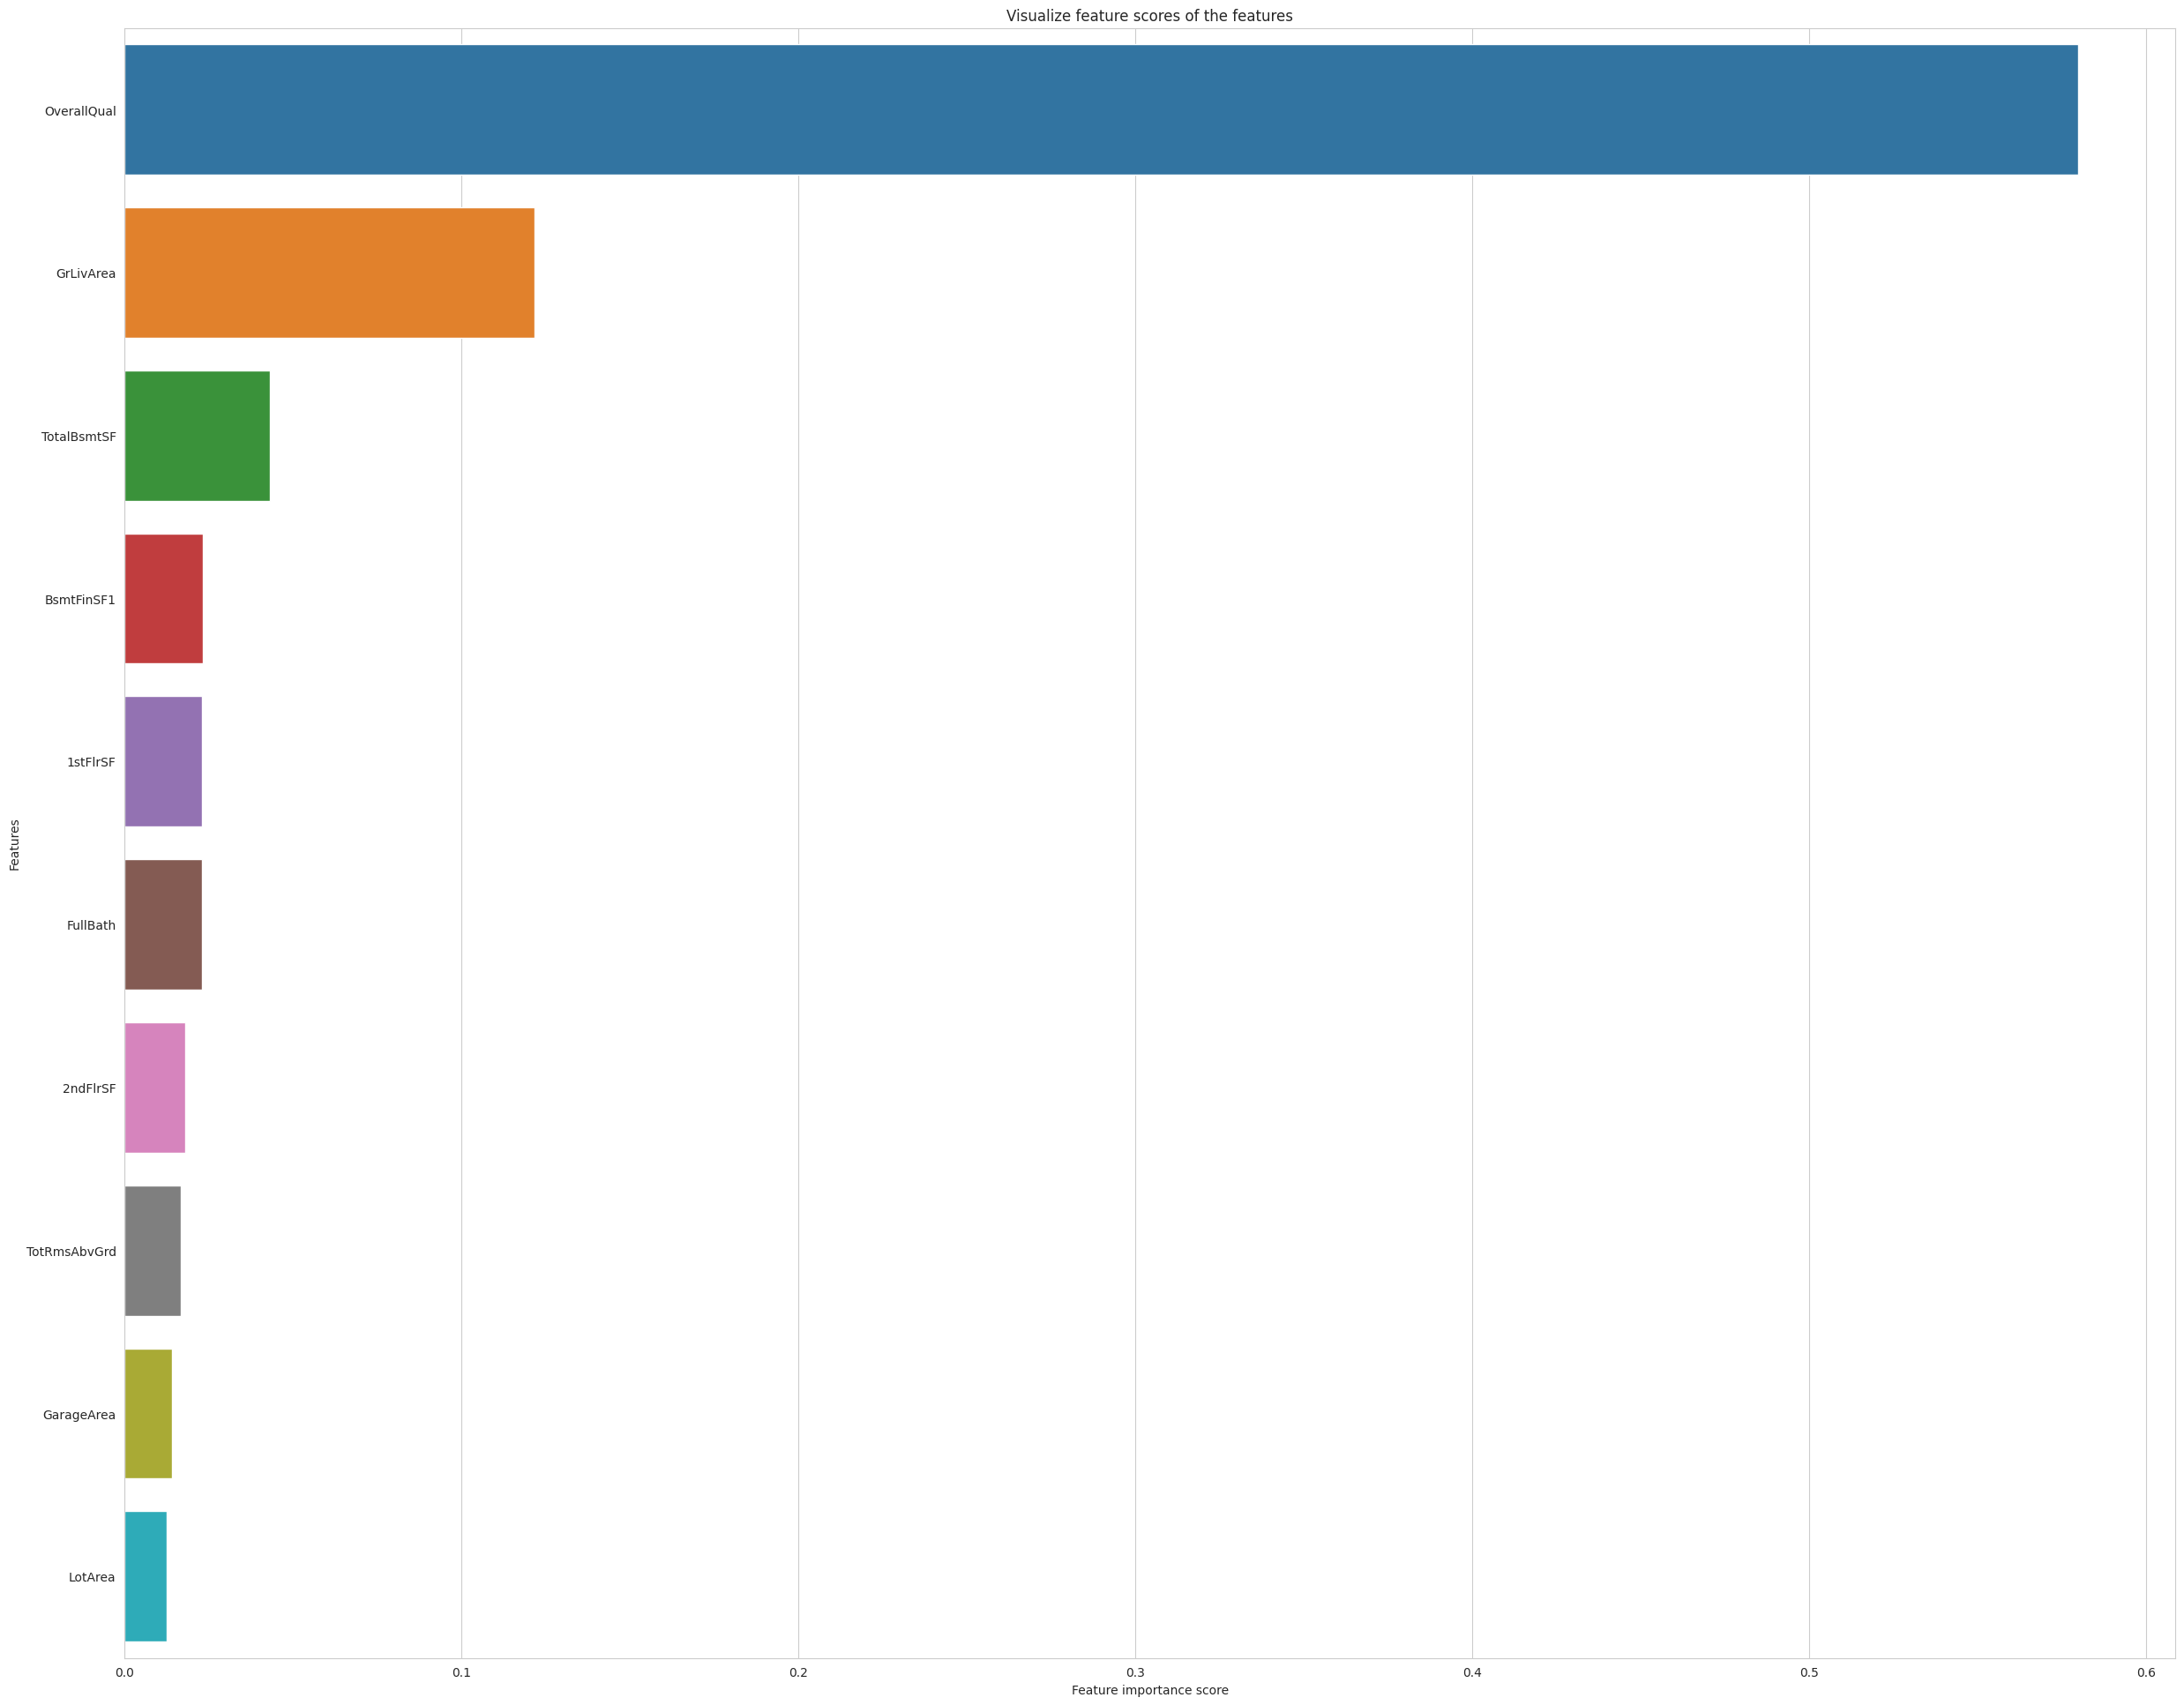

In [100]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores[:10], y=feature_scores.index[:10])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:10])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

***Dropping the unwanted features***

In [101]:
low_var_list = ['Alley', 'YrSold', 'PoolQC', 'MiscFeature', 'MiscVal', 'GarageYrBlt', 'YearBuilt', 'MoSold', 
            '1stFlrSF', '2ndFlrSF', 'LotArea', 'YearRemodAdd', 'Street', 'Utilities', 'LandSlope', 
            'Condition2', 'RoofMatl', 'Heating', 'GarageCond']
data2.drop(low_var_list, axis = 1, inplace = True)

***Now we repeat the same steps performed above i.e. splitting into train and test set, imputation of NaN values, encoding, scaling and then training!***

In [102]:
x1 = data2.drop(['SalePrice'], axis = 1)
y1 = data2['SalePrice']

In [103]:
train_x4, test_x4, train_y4, test_y4 = train_test_split(x1, y1, random_state = 69)

In [104]:
train_num1 = train_x4.select_dtypes(include = 'number')
train_cat1 = train_x4.select_dtypes(include = 'object')

test_num1 = test_x4.select_dtypes(include = 'number')
test_cat1 = test_x4.select_dtypes(include = 'object')

In [105]:
print('Missing values before imputation \n', train_num1.isnull().sum())
train_num1.fillna(train_num1.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', train_num1.isnull().sum())

Missing values before imputation 
 MSSubClass         0
LotFrontage      191
OverallQual        0
OverallCond        0
MasVnrArea         4
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
dtype: int64


Missing values after imputation 
 MSSubClass       0
LotFrontage      0
OverallQual      0
OverallCond      0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Firepla

In [106]:
print('Missing values before imputation \n', train_cat1.isnull().sum())
train_cat1.fillna(train_cat1.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', train_cat1.isnull().sum())

Missing values before imputation 
 MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         4
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          24
BsmtCond          24
BsmtExposure      25
BsmtFinType1      24
BsmtFinType2      24
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      509
GarageType        56
GarageFinish      56
GarageQual        56
PavedDrive         0
Fence            883
SaleType           0
SaleCondition      0
dtype: int64


Missing values after imputation 
 MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType    

In [107]:
print('Missing values before imputation \n', test_cat1.isnull().sum())
test_cat1.fillna(train_cat1.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', test_cat1.isnull().sum())


Missing values before imputation 
 MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         4
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          12
BsmtCond          12
BsmtExposure      12
BsmtFinType1      12
BsmtFinType2      13
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      177
GarageType        23
GarageFinish      23
GarageQual        23
PavedDrive         0
Fence            296
SaleType           0
SaleCondition      0
dtype: int64


Missing values after imputation 
 MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType    

In [108]:
print('Missing values before imputation \n', test_num1.isnull().sum())
test_num1.fillna(train_num1.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', test_num1.isnull().sum())

Missing values before imputation 
 MSSubClass        0
LotFrontage      67
OverallQual       0
OverallCond       0
MasVnrArea        4
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
dtype: int64


Missing values after imputation 
 MSSubClass       0
LotFrontage      0
OverallQual      0
OverallCond      0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars     

In [109]:
train_num1.reset_index(inplace = True, drop = True)
train_cat1.reset_index(inplace = True, drop = True)
test_num1.reset_index(inplace = True, drop = True)
test_cat1.reset_index(inplace = True, drop = True)

In [110]:
train_x5 = pd.concat([train_num1, train_cat1], axis = 1)
test_x5 = pd.concat([test_num1, test_cat1], axis = 1) 

In [111]:
encoder1 = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder1.fit(train_x5)
train_x5 = pd.DataFrame(encoder1.transform(train_x5), columns = encoder1.get_feature_names_out())
test_x5 = pd.DataFrame(encoder1.transform(test_x5), columns = encoder1.get_feature_names_out())

In [112]:
scaler1 = StandardScaler()
scaler1.fit(train_x5)
train_x5 = pd.DataFrame(scaler1.transform(train_x5), columns = train_x5.columns)
test_x5 = pd.DataFrame(scaler1.transform(test_x5), columns = test_x5.columns)

In [113]:
model7 = LinearRegression()
model8 = DecisionTreeRegressor(random_state = 69)
model9 = RandomForestRegressor(random_state = 69)
model10 = KNeighborsRegressor()
model11 = xgb.XGBRegressor()

***Linear Regression***

In [114]:
model7.fit(train_x5, train_y4)
pred7 = model7.predict(test_x5)

In [115]:
mae7 = mean_absolute_error(test_y4, pred7)

In [116]:
mae7

7594997395350683.0

In [117]:
model8.fit(train_x5, train_y4)
pred8 = model8.predict(test_x5)

mae8 = mean_absolute_error(test_y4, pred8)

mae8

30708.658469945356

In [118]:
model9.fit(train_x5, train_y4)
pred9 = model9.predict(test_x5)

mae9 = mean_absolute_error(test_y4, pred9)

mae9

23307.16379781421

In [119]:
model10.fit(train_x5, train_y4)
pred10 = model10.predict(test_x5)

mae10 = mean_absolute_error(test_y4, pred10)

mae10

68548.27814207651

In [120]:
model11.fit(train_x5, train_y4)
pred11 = model11.predict(test_x5)

mae11 = mean_absolute_error(test_y4, pred11)

mae11

21998.337271601777